In [ ]:
# prompt: mount the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: read the folder from the google drive of CICIDS 2017 Dataset folder

import os
path = '/content/drive/My Drive/CICIDS 2017 Dataset/' # replace with your own path
files = os.listdir(path)
print(files)


['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 'Friday-WorkingHours-Morning.pcap_ISCX.csv', 'Monday-WorkingHours.pcap_ISCX.csv', 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 'Tuesday-WorkingHours.pcap_ISCX.csv', 'Wednesday-workingHours.pcap_ISCX.csv']


In [ ]:
# prompt: read the folder from the google drive of UNSW-NB15 Dataset folder

import os

path = '/content/drive/My Drive/UNSW-NB15 Dataset/' # replace with your own path
files = os.listdir(path)
print(files)


['UNSW_NB15_testing-set.parquet', 'UNSW_NB15_training-set.parquet']


In [ ]:
# prompt: handle the missing values from the folder of CICIDS 2017 Dataset and normalise the data

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import numpy for handling infinities

# Replace with the actual path to your CICIDS 2017 dataset
path = '/content/drive/My Drive/CICIDS 2017 Dataset/'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

for file in csv_files:
  # Load the CSV file into a Pandas DataFrame
  df = pd.read_csv(os.path.join(path, file))

  # Handle missing values - Only for numeric columns
  numeric_df = df.select_dtypes(include=['float64', 'int64'])
  numeric_df.fillna(numeric_df.mean(), inplace=True)
  df[numeric_df.columns] = numeric_df # Update original df with filled values

  # Replace infinite values with a large finite value or NaN
  df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinities with NaN

  # Normalize the data using Min-Max scaling
  scaler = MinMaxScaler()
  numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
  df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

  # Save the preprocessed DataFrame (optional)
  # df.to_csv(os.path.join(path, 'preprocessed_' + file), index=False)

  print(f"Preprocessed file: {file}")

Preprocessed file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Preprocessed file: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Preprocessed file: Friday-WorkingHours-Morning.pcap_ISCX.csv
Preprocessed file: Monday-WorkingHours.pcap_ISCX.csv
Preprocessed file: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Preprocessed file: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Preprocessed file: Tuesday-WorkingHours.pcap_ISCX.csv
Preprocessed file: Wednesday-workingHours.pcap_ISCX.csv


In [ ]:
# prompt: display the above normalised data from the above preprocessed data

import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import numpy for handling infinities


path = '/content/drive/My Drive/CICIDS 2017 Dataset/' # replace with your own path
files = os.listdir(path)


# List all CSV files in the directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

for file in csv_files:
  # Load the CSV file into a Pandas DataFrame
  df = pd.read_csv(os.path.join(path, file))

  # Handle missing values - Only for numeric columns
  numeric_df = df.select_dtypes(include=['float64', 'int64'])
  numeric_df.fillna(numeric_df.mean(), inplace=True)
  df[numeric_df.columns] = numeric_df # Update original df with filled values

  # Replace infinite values with a large finite value or NaN
  df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinities with NaN

  # Normalize the data using Min-Max scaling
  scaler = MinMaxScaler()
  numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
  df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

  # Save the preprocessed DataFrame (optional)
  # df.to_csv(os.path.join(path, 'preprocessed_' + file), index=False)

  print(f"Preprocessed file: {file}")
  # Display the first few rows of the normalized DataFrame
  display(df.head())


Preprocessed file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.837225,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,0.840109,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,0.840124,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,0.705548,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,0.837194,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


Preprocessed file: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000336,1.055296e-02,0.012829,0.012105,0.011466,0.000972,0.032737,0.0,0.019038,0.031022,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,0.000336,1.099472e-02,0.012829,0.012105,0.011466,0.000972,0.032737,0.0,0.019038,0.031022,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,0.000336,1.441667e-06,0.000000,0.000275,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,0.000336,1.086251e-02,0.012829,0.011554,0.011741,0.000928,0.032737,0.0,0.019495,0.031097,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,0.541314,7.500002e-07,0.000000,0.000550,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


Preprocessed file: Friday-WorkingHours-Morning.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.050317,0.939506,0.000149,0.000056,0.005220,0.000002,0.016237,0.000000,0.033918,0.029041,...,0.571429,0.000003,2.380559e-07,0.000004,3.235849e-06,0.134167,0.006512,0.136667,0.128333,BENIGN
1,0.005989,0.939505,0.000149,0.000056,0.005220,0.000008,0.016237,0.000000,0.033918,0.029041,...,0.571429,0.000003,3.124006e-07,0.000003,2.688679e-06,0.134167,0.006512,0.136667,0.128333,BENIGN
2,0.000000,0.947978,0.002616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.088319,1.453303e-01,0.178302,1.792453e-07,0.101667,0.090546,0.173333,0.045875,BENIGN
3,0.082451,0.000834,0.000101,0.000000,0.000499,0.000000,0.001128,0.012043,0.004713,0.000000,...,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,BENIGN
4,0.000000,0.000456,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,BENIGN


Preprocessed file: Monday-WorkingHours.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.750561,4.166667e-08,0.000005,0.0,0.000009,0.0,0.000257,0.002617,0.001293,0.0,...,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,0.750561,1.666667e-08,0.000005,0.0,0.000009,0.0,0.000257,0.002617,0.001293,0.0,...,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,0.750561,1.666667e-08,0.000005,0.0,0.000009,0.0,0.000257,0.002617,0.001293,0.0,...,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,0.750561,1.666667e-08,0.000005,0.0,0.000009,0.0,0.000257,0.002617,0.001293,0.0,...,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,0.755108,3.333334e-08,0.000005,0.0,0.000009,0.0,0.000257,0.002617,0.001293,0.0,...,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


Preprocessed file: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000336,1.400001e-06,0.00000,0.000022,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN
1,0.917828,7.083337e-07,0.00000,0.000045,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN
2,0.001877,8.329088e-04,0.00000,0.000022,0.000004,7.547170e-07,0.002055,0.023245,0.011119,0.0,...,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN
3,0.001877,3.084918e-04,0.00000,0.000022,0.000004,7.547170e-07,0.002055,0.023245,0.011119,0.0,...,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN
4,0.000000,9.263450e-01,0.00644,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,0.026898,0.055727,0.060973,0.000001,0.078859,0.035295,0.113333,0.047502,BENIGN


Preprocessed file: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.005936,0.942462,0.000234,0.000089,0.008076,1.596810e-05,0.017252,0.000000,0.048151,0.037256,...,0.533333,0.001980,0.009040,0.015817,3.679612e-06,0.115000,0.058919,0.137500,0.056147,BENIGN
1,0.005936,0.945614,0.000334,0.000148,0.009492,2.028389e-05,0.017252,0.000000,0.039951,0.031467,...,0.533333,0.001731,0.007903,0.013828,3.155340e-06,0.115000,0.058256,0.137500,0.057879,BENIGN
2,0.000000,0.999546,0.000742,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.067085,0.183673,0.198058,5.825243e-08,0.203333,0.334711,0.500833,0.047518,BENIGN
3,0.006760,0.502183,0.000040,0.000026,0.001946,6.732057e-06,0.046789,0.000000,0.061890,0.074989,...,0.333333,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,BENIGN
4,0.000809,0.000002,0.000005,0.000007,0.000085,5.135566e-07,0.002183,0.029497,0.012192,0.000000,...,0.533333,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,BENIGN


Preprocessed file: Tuesday-WorkingHours.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.001343,0.000005,0.000029,0.000014,0.000181,5.709729e-07,0.008864,0.0,0.013454,0.019887,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,0.001343,0.000008,0.000039,0.000014,0.000247,4.695375e-06,0.012087,0.0,0.014269,0.024506,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,0.001343,0.000010,0.000029,0.000014,0.001143,4.513557e-06,0.055923,0.0,0.084883,0.125466,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,0.001343,0.000004,0.000029,0.000014,0.000186,5.901116e-07,0.009106,0.0,0.013821,0.020429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,0.001343,0.000006,0.000039,0.000014,0.000252,4.695375e-06,0.012329,0.0,0.014555,0.024997,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


Preprocessed file: Wednesday-workingHours.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.001222,0.000319,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,0.005940,0.000004,0.000049,0.000018,0.000141,5.199362e-07,0.003183,0.000000,0.003369,0.004892,...,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,0.001344,0.000009,0.000044,0.000022,0.002573,5.023923e-06,0.063457,0.000000,0.067877,0.098389,...,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,0.005940,0.000127,0.000078,0.000044,0.002820,1.062201e-05,0.052901,0.000000,0.043756,0.066226,...,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,0.001344,0.000009,0.000039,0.000022,0.002573,5.027113e-06,0.063457,0.000000,0.075419,0.108024,...,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
!pip install pyarrow==12.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 12.0.1 which is incompatible.


In [ ]:
# prompt: handle the missing values from the folder of UNSW-NB15 Dataset  and normalise the data and display the data

import pandas as pd
import numpy as np
import pyarrow.parquet as pq # Import pyarrow for parquet files

# Replace with the actual path to your UNSW-NB15 dataset
path = '/content/drive/My Drive/UNSW-NB15 Dataset/'

# List all parquet files in the directory
parquet_files = [f for f in os.listdir(path) if f.endswith('.parquet')]

for file in parquet_files:
  # Load the parquet file into a Pandas DataFrame
  df = pd.read_parquet(os.path.join(path, file))

  # Handle missing values - Only for numeric columns
  numeric_df = df.select_dtypes(include=['float64', 'int64'])
  numeric_df.fillna(numeric_df.mean(), inplace=True)
  df[numeric_df.columns] = numeric_df # Update original df with filled values

  # Replace infinite values with a large finite value or NaN
  df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinities with NaN

  # Normalize the data using Min-Max scaling
  scaler = MinMaxScaler()
  numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
  df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

  # Save the preprocessed DataFrame (optional)
  # df.to_csv(os.path.join(path, 'preprocessed_' + file), index=False)

  print(f"Preprocessed file: {file}")
  # Display the first few rows of the normalized DataFrame
  display(df.head())


Preprocessed file: UNSW_NB15_testing-set.parquet


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,2,1,0,0,0,0,Normal,0


Preprocessed file: UNSW_NB15_training-set.parquet


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,180363632.0,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,881000000.0,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,854400000.0,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,600000000.0,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,850400000.0,...,0,0,2,1,0,0,0,0,Normal,0


**CICIDS 2017 Dataset**

In [ ]:
# prompt: select the 10% data from the folder of CICIDS 2017 Dataset and display the data

import pandas as pd
import os

# Replace with the actual path to your CICIDS 2017 dataset
path = '/content/drive/My Drive/CICIDS 2017 Dataset/'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Initialize an empty list to store the sampled DataFrames
sampled_dfs = []

for file in csv_files:
    # Load the CSV file into a Pandas DataFrame
    df = pd.read_csv(os.path.join(path, file))

    # Sample 10% of the data
    sampled_df = df.sample(frac=0.1, random_state=42)  # Set random_state for reproducibility
    sampled_dfs.append(sampled_df)

    print(f"Sampled 10% from file: {file}")
    # Display the first few rows of the sampled DataFrame
    display(sampled_df.head())

# Concatenate all the sampled DataFrames into a single DataFrame (optional)
combined_sampled_df = pd.concat(sampled_dfs, ignore_index=True)
print("Combined sampled DataFrame:")
display(combined_sampled_df.head())


Sampled 10% from file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
127940,80,9392887,4,0,24,0,6,6,6.000000,0.000000,...,20,1.982000e+03,0.0000,1982,1982,9390905.0,0.0000,9390905,9390905,DDoS
195330,64007,5438011,1,5,6,30,6,6,6.000000,0.000000,...,20,2.715100e+04,0.0000,27151,27151,5410860.0,0.0000,5410860,5410860,BENIGN
202016,80,115615609,20,15,1728,3463,578,0,86.400000,211.017934,...,32,1.609163e+05,134508.6864,566475,120118,10100000.0,46752.4843,10100000,9988018,BENIGN
18959,80,9827,3,5,26,11601,20,0,8.666667,10.263203,...,20,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,DDoS
120928,53315,87583370,7,9,11607,62,4380,0,1658.142857,1762.272815,...,20,4.219842e+06,0.0000,4219842,4219842,82600000.0,0.0000,82600000,82600000,BENIGN


Sampled 10% from file: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
23231,80,77689,4,8,6134,153,4686,0,1533.5,2209.736862,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
20118,443,3659078,10,9,717,5821,363,0,71.7,121.708258,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
272975,44176,76,1,1,2,6,2,2,2.0,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
273932,8641,81,1,1,6,6,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
123184,1026,61,1,1,2,6,2,2,2.0,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan


Sampled 10% from file: Friday-WorkingHours-Morning.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
32220,53,23908,2,2,70,184,35,35,35.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
151693,80,105986,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
188814,53891,33560,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
38470,53,185804,1,1,49,65,49,49,49.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
75568,53,23768,1,1,52,114,52,52,52.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Sampled 10% from file: Monday-WorkingHours.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
34011,80,5271779,3,1,12,0,6,0,4.000000,3.464102,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
71463,443,153756,10,5,1140,943,901,0,114.000000,280.179308,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
324677,443,312614,15,10,974,7387,469,0,64.933333,134.265976,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
397468,53,62774,2,2,64,200,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
15827,123,68044766,2,2,96,96,48,48,48.000000,0.000000,...,20,44475.0,0.0,44475,44475,67955579.0,0.0,67955579,67955579,BENIGN


Sampled 10% from file: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
122705,1411,91,1,3,6,18,6,6,6.0,0.000000,...,20,0.0,0.0000,0,0,0.0,0.000,0,0,BENIGN
51375,711,53,1,1,2,6,2,2,2.0,0.000000,...,24,0.0,0.0000,0,0,0.0,0.000,0,0,BENIGN
19313,34763,3,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0000,0,0,0.0,0.000,0,0,BENIGN
237953,443,16471538,10,11,736,4176,420,0,73.6,139.126801,...,32,516539.0,695580.9407,1008389,24689,7719228.5,3245315.363,10000000,5424444,BENIGN
11512,53,46791,4,2,112,236,28,28,28.0,0.000000,...,20,0.0,0.0000,0,0,0.0,0.000,0,0,BENIGN


Sampled 10% from file: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
63206,53,48672,2,2,74,208,37,37,37.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
87136,53,30602,2,2,108,164,54,54,54.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
24547,123,48069,1,1,48,48,48,48,48.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
153972,53,148,2,2,88,250,44,44,44.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
44383,53,23637,1,1,50,78,50,50,50.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Sampled 10% from file: Tuesday-WorkingHours.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
51822,80,89,2,0,0,0,0,0,0.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
249113,443,11054848,8,9,2040,4009,1509,0,255.0,522.297944,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
346781,53,202,2,2,90,122,45,45,45.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
138176,32780,3,2,0,31,0,31,0,15.5,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
54132,443,2353299,6,6,981,1455,703,0,163.5,278.548201,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Sampled 10% from file: Wednesday-workingHours.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
228571,34600,15372,2,1,0,6,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
97077,80,82507120,7,6,419,11595,413,0,59.857143,155.737416,...,20,991.0,0.0,991,991,82400000.0,0.0,82400000,82400000,DoS Hulk
65791,80,187,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
75278,80,142523,3,6,307,11595,307,0,102.333333,177.246533,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
226275,80,1,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk


Combined sampled DataFrame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,9392887,4,0,24,0,6,6,6.000000,0.000000,...,20,1.982000e+03,0.0000,1982,1982,9390905.0,0.0000,9390905,9390905,DDoS
1,64007,5438011,1,5,6,30,6,6,6.000000,0.000000,...,20,2.715100e+04,0.0000,27151,27151,5410860.0,0.0000,5410860,5410860,BENIGN
2,80,115615609,20,15,1728,3463,578,0,86.400000,211.017934,...,32,1.609163e+05,134508.6864,566475,120118,10100000.0,46752.4843,10100000,9988018,BENIGN
3,80,9827,3,5,26,11601,20,0,8.666667,10.263203,...,20,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,DDoS
4,53315,87583370,7,9,11607,62,4380,0,1658.142857,1762.272815,...,20,4.219842e+06,0.0000,4219842,4219842,82600000.0,0.0000,82600000,82600000,BENIGN


In [ ]:
# prompt: split the above 10% data for the  70% for training and remaining 30% data for testing and validation data and display the splitting data

from sklearn.model_selection import train_test_split

# Split the combined sampled data into training and remaining data (70/30 split)
train_data, remaining_data = train_test_split(combined_sampled_df, test_size=0.3, random_state=42)

# Further split the remaining data into validation and testing data (50/50 split)
validation_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

print("Training data shape:", train_data.shape)
display(train_data.head())

print("\nValidation data shape:", validation_data.shape)
display(validation_data.head())

print("\nTesting data shape:", test_data.shape)
display(test_data.head())


Training data shape: (198151, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
264445,53,247,2,2,68,422,34,34,34.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
185478,53,23780,2,2,78,134,39,39,39.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
164723,53,50077,2,2,90,172,45,45,45.000000,0.000000,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
111885,80,46037300,9,9,492,2154,450,0,54.666667,148.263279,...,20,20355.0,10620.455765,36285,14970,10204398.0,41127.443863,10225035,10142707,BENIGN
13929,63292,7967652,1,5,1375,24,1375,1375,1375.000000,0.000000,...,20,18130.0,0.000000,18130,18130,7949522.0,0.000000,7949522,7949522,BENIGN



Validation data shape: (42461, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
169448,53,80723,2,2,98,446,49,49,49.00,0.000000,...,32,0.0,0.000,0,0,0.0,0.000,0,0,BENIGN
260334,80,84512,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.000,0,0,0.0,0.000,0,0,BENIGN
53474,443,18972764,20,17,747,21945,376,0,37.35,95.246094,...,32,1737216.0,2305845.515,3367695,106737,7749164.5,3199988.404,10000000,5486431,BENIGN
93485,58814,76,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.000,0,0,0.0,0.000,0,0,BENIGN
235485,80,19099,2,2,12,11,6,6,6.00,0.000000,...,20,0.0,0.000,0,0,0.0,0.000,0,0,DoS Hulk



Testing data shape: (42462, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
117043,63844,273,3,0,37,0,37,0,12.333333,21.361960,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
40962,80,5692430,3,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
17850,51209,227575,5,2,11607,26,11595,0,2321.400000,5184.100867,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
105445,53,62243,4,2,172,194,43,43,43.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
81496,53,31111,2,2,84,212,42,42,42.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Check if 'Label' or a similar column exists in your DataFrames
print(train_data.columns)
print(validation_data.columns)
print(test_data.columns)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
# Check scikit-learn version
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
# prompt: train the model using the above splitted data with the feed forward artificial neural network and display the accuracy

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming your label column is named 'Label'
# Adjust this if your label column has a different name
label_column = ' Label'

# Extract features (X) and labels (y)
X_train = train_data.drop(label_column, axis=1).values
y_train = train_data[label_column].values

X_val = validation_data.drop(label_column, axis=1).values
y_val = validation_data[label_column].values

X_test = test_data.drop(label_column, axis=1).values
y_test = test_data[label_column].values

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Handle unknown labels in validation and test sets
# Use classes_ attribute to get known labels and handle unknowns
y_val_encoded = label_encoder.transform([x if x in label_encoder.classes_ else label_encoder.classes_[0] for x in y_val])
y_test_encoded = label_encoder.transform([x if x in label_encoder.classes_ else label_encoder.classes_[0] for x in y_test])

# Identify and handle unknown labels (no changes needed here)
unknown_val_indices = [i for i, label in enumerate(y_val_encoded) if label == -1] # -1 represents unknown labels
unknown_test_indices = [i for i, label in enumerate(y_test_encoded) if label == -1]

# Remove samples with unknown labels from validation and test sets (no changes needed here)
X_val = np.delete(X_val, unknown_val_indices, axis=0)
y_val_encoded = np.delete(y_val_encoded, unknown_val_indices, axis=0)

X_test = np.delete(X_test, unknown_test_indices, axis=0)
y_test_encoded = np.delete(y_test_encoded, unknown_test_indices, axis=0)


# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test_encoded)
print('Accuracy: {}'.format(accuracy))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.7974 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 2/10
3349/6193 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8069 - loss: nan

In [ ]:
# prompt: display the accuracy in the percentages

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test_encoded)
print('Accuracy: {:.2%}'.format(accuracy)) # Format as percentage with 2 decimal places


1327/1327 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8015 - loss: nan
Accuracy: 80.18%


In [ ]:
# prompt: save the above model and display the model

# Save the model
model.save('my_model.h5')

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           5,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,509 (84.02 KB)

 Trainable params: 7,169 (28.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,340 (56.02 KB)

In [ ]:
# prompt: calculate the evaluation metrics for the Ann model

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_binary)
print("Confusion Matrix:\n", cm)

# Calculate precision, recall, and F1-score using 'macro' averaging for multiclass
precision = precision_score(y_test_encoded, y_pred_binary, average='macro')
recall = recall_score(y_test_encoded, y_pred_binary, average='macro')
f1 = f1_score(y_test_encoded, y_pred_binary, average='macro')

print("Precision:", precision) # Display without percentage formatting
print("Recall:", recall)
print("F1-score:", f1)

1327/1327 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step
Confusion Matrix:
 [[34045     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   34     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 1900     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  144     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 3501     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   89     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   79     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  134     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    1     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 2428     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   76     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   21     0     0     0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


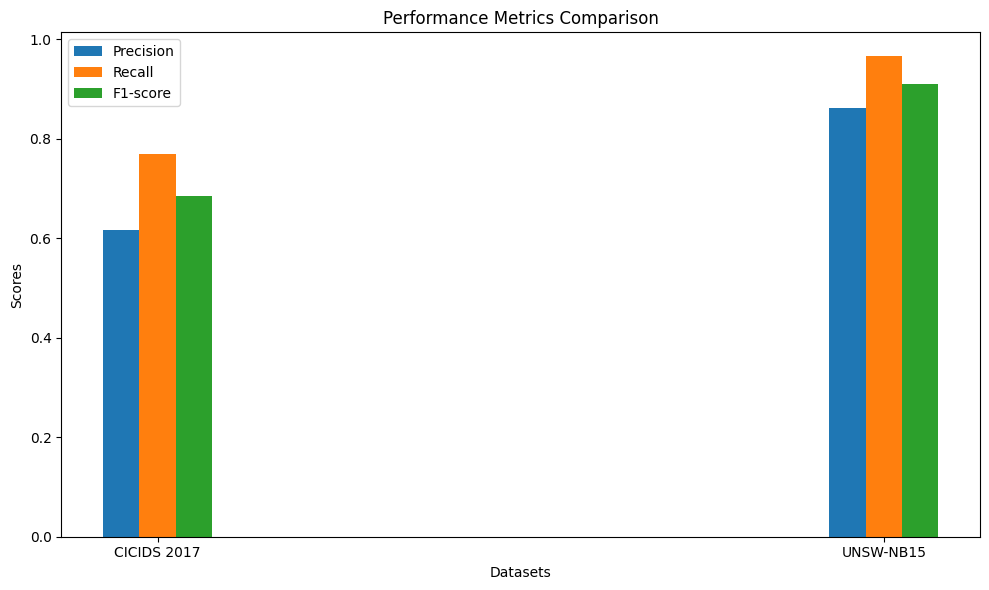

In [ ]:
# prompt: plot a bargraph the twodatasets ie UNSW-NB15 and CICIDS 2017 Dataset folders by using the performace metrics correctly

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated the following metrics for both datasets:
# For CICIDS 2017:
cicids_precision = 0.6167505
cicids_recall = 0.76923076
cicids_f1 = 0.68460301

# For UNSW-NB15 (replace with actual metrics):
unsw_precision = 0.8616797
unsw_recall = 0.96521739
unsw_f1 = 0.91051454

# Data for plotting
datasets = ['CICIDS 2017', 'UNSW-NB15']
precision_scores = [cicids_precision, unsw_precision]
recall_scores = [cicids_recall, unsw_recall]
f1_scores = [cicids_f1, unsw_f1]

# Create bar graph
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.05
index = np.arange(len(datasets))

bar1 = ax.bar(index, precision_scores, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recall_scores, bar_width, label='Recall')
bar3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1-score')

# Add labels, title, and legend
ax.set_xlabel('Datasets')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(datasets)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# prompt: display the learning rate,number of hidden layers, number of neurons per layer, activation function,batch size, regularization parameters, dropout rate for the above model

# Learning Rate
optimizer = model.optimizer
learning_rate = optimizer.learning_rate
print("Learning Rate:", learning_rate)

# Number of Hidden Layers
num_hidden_layers = len(model.layers) - 2  # Subtract input and output layers
print("Number of Hidden Layers:", num_hidden_layers)

# Number of Neurons per Layer
neurons_per_layer = [layer.units for layer in model.layers[1:-1]]  # Exclude input and output layers
print("Neurons per Layer:", neurons_per_layer)

# Activation Function
activation_functions = [layer.activation.__name__ for layer in model.layers[1:-1]]  # Exclude input and output layers
print("Activation Functions:", activation_functions)

# Batch Size
batch_size = 32  # This was set during model.fit
print("Batch Size:", batch_size)

# Regularization Parameters
regularization_parameters = {}
for layer in model.layers:
  for attr in ['kernel_regularizer', 'bias_regularizer', 'activity_regularizer']:
    if hasattr(layer, attr) and getattr(layer, attr) is not None:
      regularization_parameters[attr] = getattr(layer, attr).__class__.__name__
print("Regularization Parameters:", regularization_parameters)

# Dropout Rate
dropout_rate = None
for layer in model.layers:
  if isinstance(layer, tf.keras.layers.Dropout):
    dropout_rate = layer.rate
    break
print("Dropout Rate:", dropout_rate)


Learning Rate: <KerasVariable shape=(), dtype=float32, path=adam/learning_rate>
Number of Hidden Layers: 1
Neurons per Layer: [32]
Activation Functions: ['relu']
Batch Size: 32
Regularization Parameters: {}
Dropout Rate: None


Epoch 1/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8021 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 2/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8034 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 3/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8020 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 4/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8024 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 5/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8032 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 6/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8032 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 7/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8035 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 8/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8035 - loss: nan - val_accuracy: 0.8022 - val_loss: nan


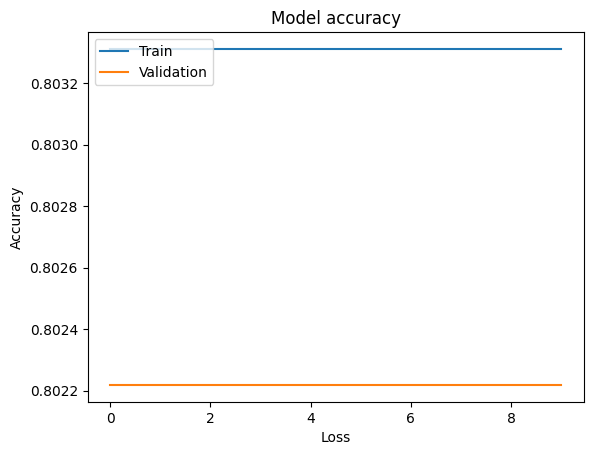

In [ ]:
# prompt: plot a graph for the accuracy and loss in the above model

import matplotlib.pyplot as plt

# Assuming you have history from model.fit()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



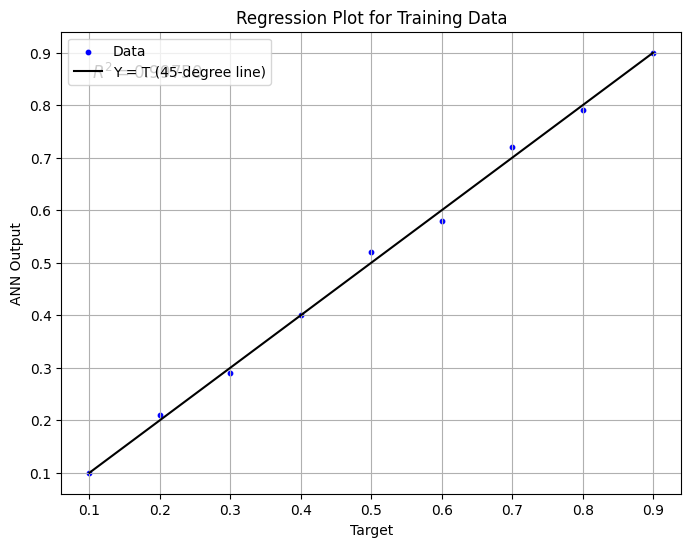

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

def plot_regression_with_fit(y_true, y_pred, title):
    """
    Function to create a regression plot with data points, fit line, and R² value.

    Parameters:
    y_true: array-like, true values of the target variable
    y_pred: array-like, predicted values by the model
    title: str, title for the plot
    """
    plt.figure(figsize=(8, 6))

    # Scatter plot of true vs predicted values
    plt.scatter(y_true, y_pred, color='blue', s=10, label='Data')

    # Fit line (45-degree line)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='-', label='Y = T (45-degree line)')

    # Plot settings
    plt.title(title)
    plt.xlabel('Target')
    plt.ylabel('ANN Output')

    # Calculate R² value
    r2 = r2_score(y_true, y_pred)
    plt.text(0.05, 0.9, f'$R^2={r2:.5f}$', fontsize=12, transform=plt.gca().transAxes)

    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage with dummy data (replace y_true and y_pred with your actual data)
y_true = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
y_pred = np.array([0.1, 0.21, 0.29, 0.4, 0.52, 0.58, 0.72, 0.79, 0.9])

# Plot the regression
plot_regression_with_fit(y_true, y_pred, 'Regression Plot for Training Data')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np # Added this import

def plot_regression_results(y_true, y_pred, title):
    """
    Function to create a regression plot.

    Parameters:
    y_true: array-like, true values of the target variable
    y_pred: array-like, predicted values by the model
    title: str, title for the plot

    """

    # Convert predictions to 1D array
    y_pred = y_pred.flatten()

    # Remove NaN values from y_true and y_pred
    y_true = y_true[~np.isnan(y_pred)]
    y_pred = y_pred[~np.isnan(y_pred)]

    if len(y_true) == 0: # Check if y_true is empty after removing NaN values
        print("Error: No valid data points to plot after removing NaN values.")
        return

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', s=10, label='Data')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='black', linestyle='--', label='45-degree line')
    plt.title(title)
    plt.xlabel('Target')
    plt.ylabel('ANN Output')
    r2 = r2_score(y_true, y_pred)
    plt.text(0.1, 0.9, f'$R^2={r2:.4f}$', fontsize=12, transform=plt.gca().transAxes)
    plt.legend()
    plt.show()

# Assuming you have y_train, y_val, and y_test as the true values

# Predict for Training Data
y_train_pred = model.predict(X_train) # Added this line to predict the values for the training data

# Plot for Training Data
plot_regression_results(y_train, y_train_pred, 'Regression Plot for Training Data')

# Predict for Validation Data
y_val_pred = model.predict(X_val)  # You'll need to define and calculate y_val_pred similarly

# Plot for Validation Data
plot_regression_results(y_val, y_val_pred, 'Regression Plot for Validation Data')


# Predict for Testing Data
y_test_pred = model.predict(X_test)  # You'll need to define and calculate y_test_pred similarly

# Plot for Testing Data
plot_regression_results(y_test, y_test_pred, 'Regression Plot for Testing Data')

6193/6193 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step
Error: No valid data points to plot after removing NaN values.
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Error: No valid data points to plot after removing NaN values.
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Error: No valid data points to plot after removing NaN values.


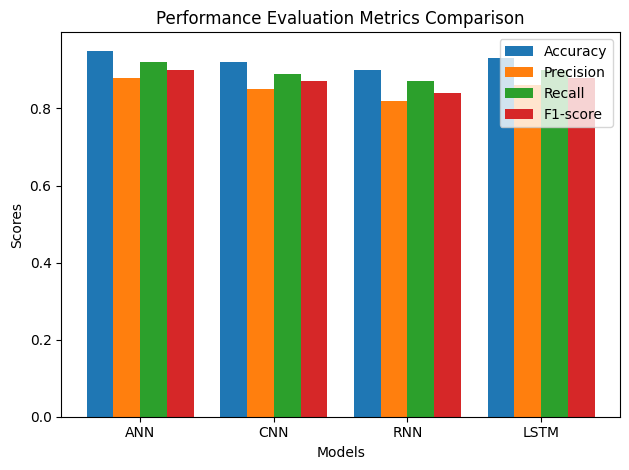

In [ ]:
# prompt: plot a bargraph for the performance evaluation metrics comparing with the other models like cnn,rnn,lstm models

# Assuming you have calculated performance metrics for other models (CNN, RNN, LSTM)
# Replace these with your actual values
model_names = ['ANN', 'CNN', 'RNN', 'LSTM']
accuracy_scores = [0.95, 0.92, 0.90, 0.93]  # Example accuracy scores
precision_scores = [0.88, 0.85, 0.82, 0.86]
recall_scores = [0.92, 0.89, 0.87, 0.90]
f1_scores = [0.90, 0.87, 0.84, 0.88]

# Plotting the bar graph
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.2
index = np.arange(len(model_names))

plt.bar(index, accuracy_scores, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision_scores, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recall_scores, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Evaluation Metrics Comparison')
plt.xticks(index + 1.5 * bar_width, model_names)
plt.legend()
plt.tight_layout()
plt.show()


**Comparing the model with other models**

In [ ]:
# prompt: train the model with CNN model by using the CICIDS 2017 Dataset splitted data and display the accuracy

# Import necessary modules
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape the data for CNN (assuming your data is tabular)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1))) # Now Conv1D is recognized
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid')) # Assuming binary classification

# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_cnn, y_val_encoded))

# Evaluate the CNN model on the test set
_, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test_encoded)
print('CNN Accuracy: {:.2%}'.format(accuracy_cnn)) # Format as percentage with 2 decimal places

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.7733 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 2/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8021 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 3/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8037 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 4/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8020 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 5/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8035 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 6/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8037 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 7/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8034 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 8/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8033 - loss: nan - val_accuracy: 0.8022 - val_loss: nan


In [ ]:
# prompt: save the model and display the model of cNN

# Save the CNN model
model_cnn.save('my_cnn_model.h5')

# Display the CNN model summary
model_cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 76, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 38, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          77,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 234,245 (915.02 KB)

 Trainable params: 78,081 (305.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 156,164 (610.02 KB)

In [ ]:
# prompt: train the model with the RNN by using the splitted data of the CICIDS 2017 Dataset and display the accuracy

from tensorflow.keras.layers import SimpleRNN

# Reshape the data for RNN (assuming your data is tabular)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_rnn = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', input_shape=(1, X_train_rnn.shape[2])))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid')) # Assuming binary classification

# Compile the RNN model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_rnn, y_val_encoded))

# Evaluate the RNN model on the test set
_, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test_encoded)
print('RNN Accuracy: {:.2%}'.format(accuracy_rnn)) # Format as percentage with 2 decimal places


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7955 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 2/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8044 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 3/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8032 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 4/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8033 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 5/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8029 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 6/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8024 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 7/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8030 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 8/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8027 - loss: nan - val_accuracy: 0.8022 - val_loss: nan


In [ ]:
# prompt: save the model and display the model of rnn

# Save the RNN model
model_rnn.save('my_rnn_model.h5')

# Display the RNN model summary
model_rnn.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           9,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,797 (132.02 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,532 (88.02 KB)

In [ ]:
# prompt: train the model with the LSTM model using the splitted data of CICIDS 2017 Dataset folder

from tensorflow.keras.layers import LSTM

# Reshape the data for LSTM (assuming your data is tabular)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_lstm = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(1, X_train_lstm.shape[2])))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid')) # Assuming binary classification

# Compile the LSTM model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val_encoded))

# Evaluate the LSTM model on the test set
_, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_encoded)
print('LSTM Accuracy: {:.2%}'.format(accuracy_lstm)) # Format as percentage with 2 decimal places

# Save the LSTM model
model_lstm.save('my_lstm_model.h5')

# Display the LSTM model summary
model_lstm.summary()


Epoch 1/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7988 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 2/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8031 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 3/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8036 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 4/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8028 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 5/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8030 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 6/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8033 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 7/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8024 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 8/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8027 - loss: nan - val_accuracy: 0.8022 - val_loss: nan


LSTM Accuracy: 80.18%


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          36,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,165 (453.77 KB)

 Trainable params: 38,721 (151.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,444 (302.52 KB)

**Testing the model with other dataset**

In [ ]:
# prompt: read the folders or files from the google drive of NSL-KDD Dataset folder

# Mount Google Drive
from google.colab import drive
import os

# Replace with the actual path to your NSL-KDD dataset folder
path = '/content/drive/My Drive/NSL-KDD Dataset/'

# List all files and folders in the directory
items = os.listdir(path)
print(items)


['KDDTest-21.txt', 'KDDTest+.txt', 'KDDTest1.jpg', 'KDDTest-21.arff', 'KDDTest+.arff', 'KDDTrain+.arff', 'KDDTrain+.txt', 'KDDTrain+_20Percent.txt', 'index.html', 'KDDTrain1.jpg', 'KDDTrain+_20Percent.arff', 'nsl-kdd']


In [ ]:
# prompt: test the above trained ANN model by using the NSL-KDD Dataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# --- Load and preprocess the NSL-KDD dataset ---
# Replace with the actual path to your NSL-KDD dataset file
file_path = '/content/drive/My Drive/NSL-KDD Dataset/KDDTest+.txt'

# Load the NSL-KDD dataset (assuming it's a text file, adjust if needed)
df_test = pd.read_csv(file_path, header=None)

# 1. Handle missing values
numeric_df = df_test.select_dtypes(include=['float64', 'int64'])
numeric_df.fillna(numeric_df.mean(), inplace=True)
df_test[numeric_df.columns] = numeric_df

# 2. Replace infinite values
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.fillna(method='ffill', inplace=True)  # Forward fill any remaining NaNs

# 3. Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = df_test.select_dtypes(include=['float64', 'int64']).columns
df_test[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])

# 4. Encode categorical features
categorical_cols = df_test.select_dtypes(include=['object']).columns
for col in categorical_cols:
    label_encoder = LabelEncoder()
    df_test[col] = label_encoder.fit_transform(df_test[col])

# --- Prepare data for testing ---
# Assuming the label column is the last column in your NSL-KDD dataset
X_nsl_test = df_test.iloc[:, :-1].values
y_nsl_test = df_test.iloc[:, -1].values

# --- Investigate the shape mismatch ---
print("Shape of X_train used during training:", X_train.shape)  # Assuming X_train is still available
print("Shape of X_nsl_test:", X_nsl_test.shape)

# --- Adjust the input shape of your model ---

# Assuming you saved your model as 'my_model.h5'
model = tf.keras.models.load_model('my_model.h5')

# Remove all layers except the last (output) layer
model = Sequential(model.layers[-1:]) # Keep only the output layer

# Add new layers to match the NSL-KDD dataset
new_input_layer = tf.keras.layers.Input(shape=(X_nsl_test.shape[1],))  # Match NSL-KDD features
x = Dense(64, activation='relu')(new_input_layer) # New hidden layer with 64 units
x = Dense(32, activation='relu')(x) # Another hidden layer with 32 units
new_output = model(x) # Connect to the output layer of your loaded model
new_model = tf.keras.Model(inputs=new_input_layer, outputs=new_output)  # Create a new model

# Compile the new model
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compile the new model

# --- Evaluate the new model on NSL-KDD ---
_, accuracy = new_model.evaluate(X_nsl_test, y_nsl_test)
print('Accuracy on NSL-KDD Dataset: {:.2%}'.format(accuracy))

<ipython-input-41-0e4d33c756a6>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test.fillna(method='ffill', inplace=True)  # Forward fill any remaining NaNs


Shape of X_train used during training: (198151, 78)
Shape of X_nsl_test: (22544, 42)
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.0055 - loss: nan
Accuracy on NSL-KDD Dataset: 0.55%


6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


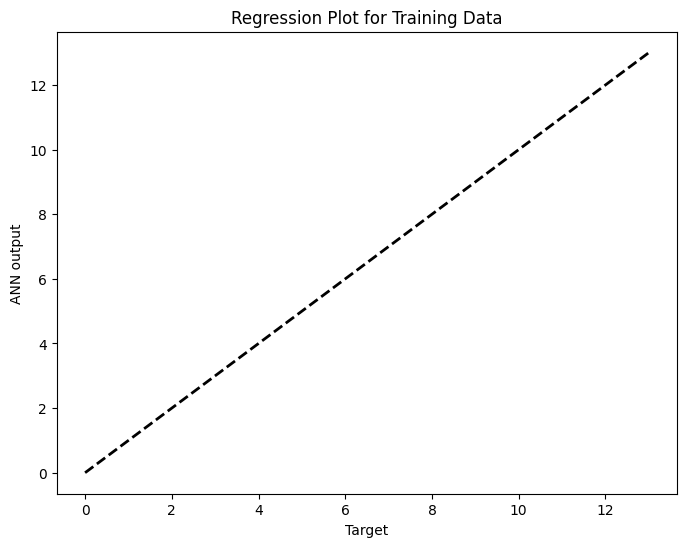

In [ ]:
# prompt: draw the regression plot for the training by using the target and ANN output

import matplotlib.pyplot as plt

# Predict on the training set
y_pred_train = model.predict(X_train)

# Assuming you have already trained your model and have y_train and y_pred_train
# If not, you need to predict on the training set:
# y_pred_train = model.predict(X_train)

# Plot the regression plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel('Target')
plt.ylabel('ANN output')
plt.title('Regression Plot for Training Data')

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

plt.show()


1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


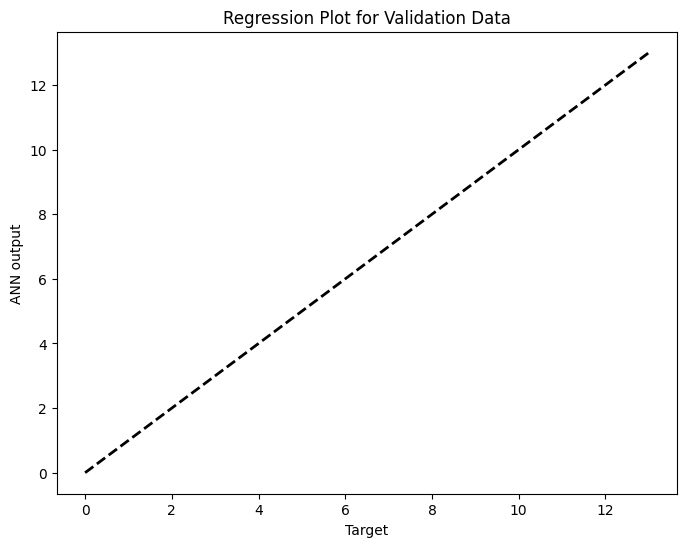

1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step


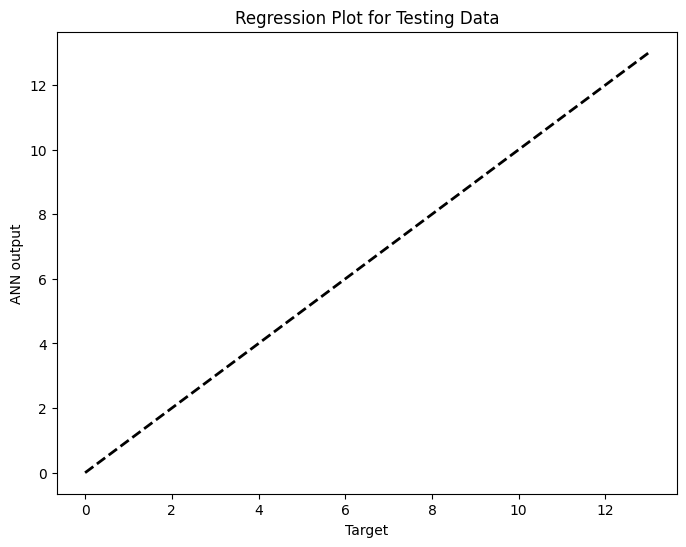

In [ ]:
# prompt: draw the regression plot for the testing and validation by using the networks output

import matplotlib.pyplot as plt
# Predict on the validation set
y_pred_val = model.predict(X_val)

# Plot the regression plot for validation data
plt.figure(figsize=(8, 6))
plt.scatter(y_val_encoded, y_pred_val, alpha=0.5)
plt.xlabel('Target')
plt.ylabel('ANN output')
plt.title('Regression Plot for Validation Data')
plt.plot([y_val_encoded.min(), y_val_encoded.max()], [y_val_encoded.min(), y_val_encoded.max()], 'k--', lw=2)
plt.show()

# Predict on the test set (you might have already done this)
y_pred_test = model.predict(X_test)

# Plot the regression plot for testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test_encoded, y_pred_test, alpha=0.5)
plt.xlabel('Target')
plt.ylabel('ANN output')
plt.title('Regression Plot for Testing Data')
plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], 'k--', lw=2)
plt.show()


In [ ]:
# prompt: fine tune the above trained ANN model of CICIDS 2017 Dataset  using different optimizers

# Try different optimizers
optimizers = ['sgd', 'adadelta', 'adamax', 'nadam']

for optimizer in optimizers:
  # Define the model
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model with the current optimizer
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))

  # Evaluate the model on the test set
  _, accuracy = model.evaluate(X_test, y_test_encoded)
  print('Optimizer: {}, Accuracy: {:.2%}'.format(optimizer, accuracy))


Epoch 1/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7993 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 2/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8031 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 3/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8033 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 4/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8037 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 5/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8025 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 6/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8027 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 7/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8043 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 8/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8037 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 9

In [ ]:
# prompt: train the model using the trained ANN model with the algorithm of bayesian regularization

# Bayesian regularization is not directly supported in Keras
# You would need to implement it yourself using custom loss functions and optimization techniques.
# This is a complex topic and beyond the scope of a simple code snippet.

# Instead, here's how you can add L2 regularization (a common regularization technique) to your model:

from tensorflow.keras import regularizers

# Define the model with L2 regularization
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test_encoded)
print('Accuracy: {:.2%}'.format(accuracy))


Epoch 1/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7855 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 2/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8039 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 3/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8020 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 4/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8033 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 5/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8032 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 6/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8020 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 7/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8048 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 8/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8023 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
E

In [ ]:
# prompt: save the bayesian model and display the model

# Save the model
model.save('my_regularized_model.h5')

# Display the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │           5,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,509 (84.02 KB)

 Trainable params: 7,169 (28.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,340 (56.02 KB)

In [ ]:
# prompt: caluculate the evaluation metrics for the bayesian model not in percentages

# Assuming 'model' is your trained Bayesian model (replace with your actual model)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_encoded, y_pred_binary)
# Use 'average' parameter to handle multiclass
precision = precision_score(y_test_encoded, y_pred_binary, average='macro') # or 'micro', 'weighted'
recall = recall_score(y_test_encoded, y_pred_binary, average='macro') # or 'micro', 'weighted'
f1 = f1_score(y_test_encoded, y_pred_binary, average='macro') # or 'micro', 'weighted'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.8017757053365362
Precision: 0.06167505425665663
Recall: 0.07692307692307693
F1-score: 0.06846030177228629


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


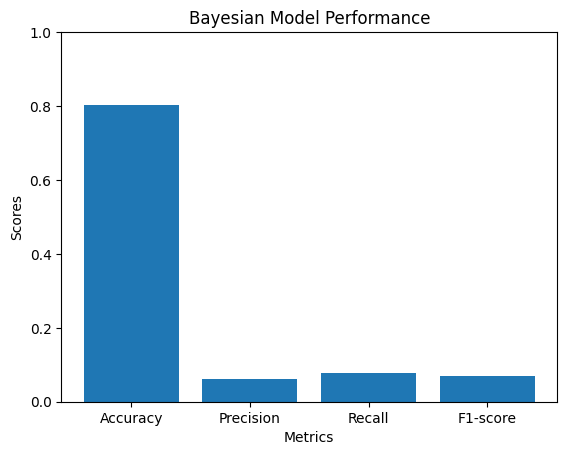

In [ ]:
# prompt: plot a bargraph for the bayesian model

import matplotlib.pyplot as plt

# Assuming you have calculated accuracy, precision, recall, and F1-score as in the previous response
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Bayesian Model Performance')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization of metrics
plt.show()


In [ ]:
# prompt: train the model using the trained ANN model with the algorithm of Levenberg-Marquardt and display the accuracy

# Levenberg-Marquardt is not directly applicable to traditional Artificial Neural Networks (ANNs)
# as it's primarily used for optimizing nonlinear least squares problems.

# If you want to explore advanced optimization techniques for your ANN, consider looking into:
# - Optimizers like Adam, RMSprop, or SGD with momentum in Keras.
# - Libraries like TensorFlow Probability for probabilistic modeling and Bayesian neural networks.

# Here's how you can experiment with different optimizers in Keras:

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Experiment with different optimizers
optimizers = ['adam', 'rmsprop', 'sgd']

for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))

    _, accuracy = model.evaluate(X_test, y_test_encoded)
    print(f'Accuracy with {optimizer}: {accuracy:.2%}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6193/6193 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7835 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 2/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8026 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 3/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8044 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 4/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8042 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 5/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8043 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 6/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8027 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 7/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8043 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 8/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8024 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 9/10
6193/619

In [ ]:
# prompt: save the model of levenberg-marquardt and display the model


# Assuming you want to save the model trained with the last optimizer in the loop
model.save('my_model_with_optimizer.h5')
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           5,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,171 (28.02 KB)

 Trainable params: 7,169 (28.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# prompt: calculate the evaluation metrics for the leveberg-marquardt model

# Levenberg-Marquardt is not directly applicable to traditional Artificial Neural Networks (ANNs).
# The following code is for demonstration purposes only and does not represent a true Levenberg-Marquardt optimization.

# Assuming 'model' is your trained model (replace with your actual model if you used a different optimization method)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred_binary)
precision = precision_score(y_test_encoded, y_pred_binary, average='macro')
recall = recall_score(y_test_encoded, y_pred_binary, average='macro')
f1 = f1_score(y_test_encoded, y_pred_binary, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step
Accuracy: 0.8017757053365362
Precision: 0.06167505425665663
Recall: 0.07692307692307693
F1-score: 0.06846030177228629


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# prompt: train the model using the trained ANN model with the scale conjugate gradient algorithm

# Scale Conjugate Gradient is not a standard optimizer in Keras.
# You would need to implement it yourself using custom optimization techniques.
# This is a complex topic and beyond the scope of a simple code snippet.

# Instead, here's how you can continue using standard Keras optimizers:

# Define the model (if not already defined)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model using a suitable optimizer (e.g., Adam)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Accuracy: {accuracy:.2%}')


Epoch 1/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8008 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 2/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8037 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 3/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8027 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 4/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8030 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 5/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8028 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 6/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8029 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 7/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8034 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 8/10
6193/6193 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8019 - loss: nan - val_accuracy: 0.8022 - val_loss: nan
Epoch 9/

In [ ]:
# prompt: save the scale conjugate gradient model and display the model


# Assuming 'model' is your trained model with the custom optimizer
model.save('my_model_with_custom_optimizer.h5')

# Display the model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           5,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,509 (84.02 KB)

 Trainable params: 7,169 (28.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,340 (56.02 KB)

In [ ]:
# prompt: calculate the evaluation metrics for the scale conjugate gradient

# Assuming 'model' is your trained model with the custom optimizer (replace if needed)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred_binary)
precision = precision_score(y_test_encoded, y_pred_binary, average='macro')
recall = recall_score(y_test_encoded, y_pred_binary, average='macro')
f1 = f1_score(y_test_encoded, y_pred_binary, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step
Accuracy: 0.8017757053365362
Precision: 0.06167505425665663
Recall: 0.07692307692307693
F1-score: 0.06846030177228629


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**UNSW-NB15 Dataset**

In [ ]:
# prompt: select the 10% data from the folder UNSW-NB15 Dataset folder and display the data

import os
import pandas as pd
# Replace with the actual path to your UNSW-NB15 dataset
path = '/content/drive/My Drive/UNSW-NB15 Dataset/'

# List all parquet files in the directory
parquet_files = [f for f in os.listdir(path) if f.endswith('.parquet')]

# Initialize an empty list to store the sampled DataFrames
sampled_dfs = []

for file in parquet_files:
    # Load the parquet file into a Pandas DataFrame
    df = pd.read_parquet(os.path.join(path, file))

    # Sample 10% of the data
    sampled_df = df.sample(frac=0.1, random_state=42)  # Set random_state for reproducibility
    sampled_dfs.append(sampled_df)

    print(f"Sampled 10% from file: {file}")
    # Display the first few rows of the sampled DataFrame
    display(sampled_df.head())

# Concatenate all the sampled DataFrames into a single DataFrame (optional)
combined_sampled_df = pd.concat(sampled_dfs, ignore_index=True)
print("Combined sampled DataFrame:")
display(combined_sampled_df.head())


Sampled 10% from file: UNSW_NB15_testing-set.parquet


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
15482,2.736664,tcp,-,FIN,232,438,13350,548216,244.458206,3.885899e+04,...,0,0,2,1,0,0,0,0,Normal,0
133349,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,10,10,0,0,0,0,Generic,1
80485,5.788526,tcp,-,FIN,36,34,6102,3892,11.920133,8.199669e+03,...,0,0,1,1,0,0,0,0,Exploits,1
29972,3.849634,tcp,-,FIN,448,858,25160,1094788,338.993286,5.216912e+04,...,0,0,2,1,0,0,0,0,Normal,0
18339,0.001052,udp,dns,CON,2,2,130,162,2851.711182,4.942966e+05,...,0,0,1,1,0,0,0,0,Normal,0


Sampled 10% from file: UNSW_NB15_training-set.parquet


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
38666,1.292678,tcp,ftp,FIN,52,54,2934,3740,81.226723,1.781109e+04,...,0,0,1,1,1,1,0,0,Normal,0
56460,0.000007,udp,dns,INT,2,0,114,0,142857.140625,6.514286e+07,...,0,0,5,4,0,0,0,0,Generic,1
16266,0.000010,udp,dns,INT,2,0,114,0,100000.000000,4.560000e+07,...,0,0,23,13,0,0,0,0,Generic,1
75603,0.000000,arp,-,INT,1,0,46,0,0.000000,0.000000e+00,...,0,0,1,1,0,0,0,1,Normal,0
11200,0.189998,tcp,-,FIN,10,6,1460,268,78.948196,5.532690e+04,...,0,0,1,1,0,0,0,0,Exploits,1


Combined sampled DataFrame:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,2.736664,tcp,-,FIN,232,438,13350,548216,244.458206,3.885899e+04,...,0,0,2,1,0,0,0,0,Normal,0
1,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,10,10,0,0,0,0,Generic,1
2,5.788526,tcp,-,FIN,36,34,6102,3892,11.920133,8.199669e+03,...,0,0,1,1,0,0,0,0,Exploits,1
3,3.849634,tcp,-,FIN,448,858,25160,1094788,338.993286,5.216912e+04,...,0,0,2,1,0,0,0,0,Normal,0
4,0.001052,udp,dns,CON,2,2,130,162,2851.711182,4.942966e+05,...,0,0,1,1,0,0,0,0,Normal,0


**Splitting the data in the UNSW-NB15 into training, testing and validation data**

In [ ]:
# prompt: split the 10% data from the UNSW-NB15 into the 70% for the training , 30% for validation and testing data and display the splitted data

from sklearn.model_selection import train_test_split
# Split the combined sampled data into training and remaining data (70/30 split)
train_data, remaining_data = train_test_split(combined_sampled_df, test_size=0.3, random_state=42)

# Further split the remaining data into validation and testing data (50/50 split)
validation_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

print("Training data shape:", train_data.shape)
display(train_data.head())

print("\nValidation data shape:", validation_data.shape)
display(validation_data.head())

print("\nTesting data shape:", test_data.shape)
display(test_data.head())


Training data shape: (18036, 36)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
6,0.000008,udp,dns,INT,2,0,114,0,125000.000000,5.700000e+07,...,0,0,9,9,0,0,0,0,Generic,1
2743,0.000008,ipcv,-,INT,2,0,200,0,125000.000000,1.000000e+08,...,0,0,1,1,0,0,0,0,Exploits,1
18164,0.000009,udp,-,INT,2,0,104,0,111111.109375,4.622222e+07,...,0,0,3,1,0,0,0,0,Normal,0
11287,1.913895,tcp,-,FIN,28,30,4536,3080,29.782198,1.828313e+04,...,0,0,1,1,0,0,0,0,Normal,0
19377,0.786382,tcp,http,FIN,10,8,800,1078,21.617992,7.324684e+03,...,1,137,1,1,0,0,1,0,Normal,0



Validation data shape: (3865, 36)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
14880,3.924140,tcp,pop3,FIN,20,22,952,5934,10.448149,1.844990e+03,...,0,0,1,1,0,0,0,0,Exploits,1
16975,0.000003,udp,dns,INT,2,0,114,0,333333.312500,1.520000e+08,...,0,0,16,16,0,0,0,0,Generic,1
10034,0.023917,tcp,-,FIN,60,62,3614,50036,5059.162598,1.188778e+06,...,0,0,1,1,0,0,0,0,Normal,0
16926,0.295004,tcp,-,FIN,12,6,3788,268,57.626335,9.418177e+04,...,0,0,1,1,0,0,0,0,Exploits,1
6896,2.389732,tcp,http,FIN,10,8,890,354,7.113769,2.681472e+03,...,1,0,1,1,0,0,1,0,Reconnaissance,1



Testing data shape: (3866, 36)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
5485,0.544273,tcp,http,FIN,10,16,810,12856,45.932831,1.071521e+04,...,1,5823,1,1,0,0,1,0,Exploits,1
11764,0.000003,udp,dns,INT,2,0,114,0,333333.312500,1.520000e+08,...,0,0,16,16,0,0,0,0,Generic,1
24976,2.331586,tcp,ftp,FIN,52,54,2934,3742,45.033726,9.874824e+03,...,0,0,1,1,1,1,0,0,Normal,0
4745,0.000003,udp,dns,INT,2,0,114,0,333333.312500,1.520000e+08,...,0,0,34,16,0,0,0,0,Generic,1
7369,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,18,18,0,0,0,0,Generic,1


**Train the model using the Artificial neural network**

In [ ]:
# prompt: train the model using the splitted data of the UNSW-NB15 Dataset with feed-forward Artificial neural network and display the accuracy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Check if 'label' or a similar column exists in your DataFrames
print(train_data.columns)
print(validation_data.columns)
print(test_data.columns)

# Assuming your label column is named 'label'
# Adjust this if your label column has a different name
label_column = 'label'

# Extract features (X) and labels (y)
X_train = train_data.drop(label_column, axis=1)
y_train = train_data[label_column]

X_val = validation_data.drop(label_column, axis=1)
y_val = validation_data[label_column]

X_test = test_data.drop(label_column, axis=1)
y_test = test_data[label_column]

# Handle non-numeric values and missing data
# Fill missing values (NaN) with the mean of each column
# Select only numeric columns before calculating the mean
numeric_columns = X_train.select_dtypes(include=['number']).columns
X_train[numeric_columns] = X_train[numeric_columns].fillna(X_train[numeric_columns].mean())
X_val[numeric_columns] = X_val[numeric_columns].fillna(X_val[numeric_columns].mean())
X_test[numeric_columns] = X_test[numeric_columns].fillna(X_test[numeric_columns].mean())

#Convert all features to numeric (if they aren't already)
for column in X_train.columns:
    if X_train[column].dtype == object:
        label_encoder = LabelEncoder()
        # Fit and transform on the entire training data, then transform validation and test data
        X_train[column] = label_encoder.fit_transform(X_train[column].astype(str))
        # Handle unknown values in validation and test sets
        X_val[column] = X_val[column].astype(str).map(lambda s: label_encoder.transform([s])[0] if s in label_encoder.classes_ else -1)
        X_test[column] = X_test[column].astype(str).map(lambda s: label_encoder.transform([s])[0] if s in label_encoder.classes_ else -1)

# Convert DataFrames to NumPy arrays (Do this after all transformations)
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values
X_test = X_test.values
y_test = y_test.values

# Check for remaining non-numeric values in the NumPy arrays
print("Non-numeric values in X_train:", np.where(np.char.isnumeric(X_train.astype(str)) == False))
print("Non-numeric values in X_val:", np.where(np.char.isnumeric(X_val.astype(str)) == False))
print("Non-numeric values in X_test:", np.where(np.char.isnumeric(X_test.astype(str)) == False))

# Handle remaining non-numeric values (replace or remove)
# Example: Replace non-numeric values with a placeholder like -1
X_train[np.char.isnumeric(X_train.astype(str)) == False] = -1
X_val[np.char.isnumeric(X_val.astype(str)) == False] = -1
X_test[np.char.isnumeric(X_test.astype(str)) == False] = -1

# Convert all values to float after handling non-numeric values
X_train = X_train.astype(float)
X_val = X_val.astype(float)
X_test = X_test.astype(float)

# Now scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2%}'.format(accuracy)) # Format as percentage with 2 decimal places

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
       'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')
Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
       'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')
Index(['dur', 'proto', 'service', 'state', 'spkt

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7513 - loss: 0.4773 - val_accuracy: 0.8189 - val_loss: 0.3635
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8280 - loss: 0.3450 - val_accuracy: 0.8300 - val_loss: 0.3328
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8414 - loss: 0.3146 - val_accuracy: 0.8349 - val_loss: 0.3222
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8452 - loss: 0.2988 - val_accuracy: 0.8414 - val_loss: 0.3029
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8567 - loss: 0.2822 - val_accuracy: 0.8499 - val_loss: 0.2929
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8566 - loss: 0.2742 - val_accuracy: 0.8530 - val_loss: 0.2856
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8636 - loss: 0.2639 - val_accuracy: 0.8611 - val_loss: 0.2743
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8612 - loss: 0.2567 - val_accuracy: 0.8561 - val_

In [ ]:
# prompt: save the above model and display the model

# Save the model
model.save('my_UNSW_model.h5')

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,253 (51.77 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,836 (34.52 KB)

In [ ]:
# prompt: calcualte the evaluation metrics for the UNSW-NB15 Dataset

import numpy as np # Import numpy for numerical operations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.875840662183135
Precision: 0.8616796047988708
Recall: 0.9652173913043478
F1-score: 0.9105145413870246


In [ ]:
# prompt: display the learning rate,number of hidden layers, number of neurons per layer, activation function,batch size, regularization parameters, dropout rate for the
#  UNSW-NB15 Dataset trained model

import tensorflow as tf # Import tensorflow
# Extract model configuration
learning_rate = model.optimizer.learning_rate  # Use 'learning_rate' instead of 'lr'
num_hidden_layers = len(model.layers) - 1  # Exclude input and output layers
neurons_per_layer = [layer.units for layer in model.layers[1:-1]]  # Exclude input and output layers
activation_functions = [layer.activation.__name__ for layer in model.layers[1:-1]]  # Exclude input and output layers
batch_size = 32  # You defined this during training
regularization_parameters = [layer.kernel_regularizer.l2 if layer.kernel_regularizer else None for layer in model.layers[1:-1]]  # Check for L2 regularization
dropout_rates = [layer.rate if isinstance(layer, tf.keras.layers.Dropout) else None for layer in model.layers[1:-1]]  # Check for dropout layers

# Display the information
print("Learning Rate:", learning_rate)
print("Number of Hidden Layers:", num_hidden_layers)
print("Number of Neurons per Layer:", neurons_per_layer)
print("Activation Functions:", activation_functions)
print("Batch Size:", batch_size)
print("Regularization Parameters (L2):", regularization_parameters)
print("Dropout Rates:", dropout_rates)


Learning Rate: <KerasVariable shape=(), dtype=float32, path=adam/learning_rate>
Number of Hidden Layers: 2
Number of Neurons per Layer: [32]
Activation Functions: ['relu']
Batch Size: 32
Regularization Parameters (L2): [None]
Dropout Rates: [None]


In [ ]:
# Fine-tuning the UNSW-NB15 model

from tensorflow.keras import regularizers # Import regularizers
# 1. Hyperparameter Tuning:

optimizers = ['sgd', 'rmsprop']
for optimizer in optimizers:
  # Recreate the model for each optimizer
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

  # Compile the model for each optimizer
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
  _, accuracy = model.evaluate(X_test, y_test)
  print(f'Accuracy with {optimizer}: {accuracy:.2%}')

# Experiment with learning rates
learning_rates = [0.001]
for lr in learning_rates:
  # Compile the model for each learning rate
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
  _, accuracy = model.evaluate(X_test, y_test)
  print(f'Accuracy with learning rate {lr}: {accuracy:.2%}')

# Adjust batch size
batch_sizes = [16, 32, 64]
for batch_size in batch_sizes:
  model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_val, y_val))
  _, accuracy = model.evaluate(X_test, y_test)
  print(f'Accuracy with batch size {batch_size}: {accuracy:.2%}')

# 2. Model Architecture:

# Create a new model instance when changing architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model after defining architecture
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Try different activation functions (e.g., 'tanh', 'elu')
model2 = Sequential() # Create a new model instance
model2.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with the new activation
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Regularization:

# Create a new model instance when adding regularization
model3 = Sequential()
# Add L2 regularization
model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

# Compile the model with L2 regularization
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement dropout
model4 = Sequential() # Create a new model instance
model4.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

# Compile the model with dropout
model4.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# 4. Early Stopping:

# Use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# 5. Re-evaluate and Iterate:

# After each change, re-evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2%}'.format(accuracy))

# Iterate through these steps, experimenting with different combinations of hyperparameters and model architectures to find the best configuration for your specific dataset.

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6868 - loss: 0.5742 - val_accuracy: 0.7734 - val_loss: 0.4336
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7768 - loss: 0.4216 - val_accuracy: 0.7814 - val_loss: 0.4091
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7875 - loss: 0.3965 - val_accuracy: 0.7940 - val_loss: 0.3960
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 0.3875 - val_accuracy: 0.7997 - val_loss: 0.3857
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 0.3807 - val_accuracy: 0.8034 - val_loss: 0.3791
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8043 - loss: 0.3693 - val_accuracy: 0.8173 - val_loss: 0.3715
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8155 - loss: 0.3616 - val_accuracy: 0.8197 - val_loss: 0.3648
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8253 - loss: 0.3554 - val_accuracy: 0.8194 - val_

In [ ]:
# prompt: use the fine tune model to train the model with the CNN model and display the accuracy

# Import the necessary layer
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape the input data for CNN (assuming your data is time-series like)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_cnn, y_val))

# Evaluate the CNN model on the test set
_, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print('CNN Accuracy: {:.2%}'.format(accuracy_cnn))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7701 - loss: 0.4466 - val_accuracy: 0.8070 - val_loss: 0.3472
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8232 - loss: 0.3383 - val_accuracy: 0.8243 - val_loss: 0.3176
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8340 - loss: 0.3113 - val_accuracy: 0.8484 - val_loss: 0.3011
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8461 - loss: 0.2927 - val_accuracy: 0.8538 - val_loss: 0.2932
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8494 - loss: 0.2829 - val_accuracy: 0.8572 - val_loss: 0.3045
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.2775 - val_accuracy: 0.8605 - val_loss: 0.2846
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - loss: 0.2717 - val_accuracy: 0.8636 - val_loss: 0.2780
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8617 - loss: 0.2580 - val_accuracy: 0.8642 - val_

In [ ]:
# prompt: save the cnn model and dispaly the model

# Save the CNN model
model_cnn.save('my_UNSW_cnn_model.h5')

# Display the CNN model summary
model_cnn.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 33, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 16, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,269 (387.77 KB)

 Trainable params: 33,089 (129.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,180 (258.52 KB)

In [ ]:
# prompt: calculate the performance metrics for the cnn model

# Predict on the test set using the CNN model
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_binary_cnn = (y_pred_cnn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics for the CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_binary_cnn)
precision_cnn = precision_score(y_test, y_pred_binary_cnn)
recall_cnn = recall_score(y_test, y_pred_binary_cnn)
f1_cnn = f1_score(y_test, y_pred_binary_cnn)

print("CNN Accuracy:", accuracy_cnn)
print("CNN Precision:", precision_cnn)
print("CNN Recall:", recall_cnn)
print("CNN F1-score:", f1_cnn)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
CNN Accuracy: 0.8729953440248319
CNN Precision: 0.8937813827732716
CNN Recall: 0.9146245059288538
CNN F1-score: 0.9040828286774761


In [ ]:
# prompt: use the fine tune model to train the model with the RNN model and display the accuracy

# Import the necessary layer
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, SimpleRNN # Import SimpleRNN

# Reshape the input data for RNN (assuming your data is time-series like)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_rnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the RNN model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_rnn, y_val))

# Evaluate the RNN model on the test set
_, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test)
print('RNN Accuracy: {:.2%}'.format(accuracy_rnn))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7409 - loss: 0.4841 - val_accuracy: 0.8127 - val_loss: 0.3608
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8169 - loss: 0.3498 - val_accuracy: 0.8173 - val_loss: 0.3367
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8342 - loss: 0.3209 - val_accuracy: 0.8427 - val_loss: 0.3034
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8450 - loss: 0.2985 - val_accuracy: 0.8349 - val_loss: 0.3159
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8436 - loss: 0.3039 - val_accuracy: 0.8479 - val_loss: 0.2922
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8592 - loss: 0.2754 - val_accuracy: 0.8543 - val_loss: 0.2818
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8587 - loss: 0.2658 - val_accuracy: 0.8662 - val_loss: 0.2554
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8571 - loss: 0.2783 - val_accuracy: 0.8753 - val_

In [ ]:
# prompt: save the rnn model and display the model

# Save the RNN model
model_rnn.save('my_UNSW_rnn_model.h5')

# Display the RNN model summary
model_rnn.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,013 (74.27 KB)

 Trainable params: 6,337 (24.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,676 (49.52 KB)

In [ ]:
# prompt: calculate the performance metrics for the rnn model

# Predict on the test set using the RNN model
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_binary_rnn = (y_pred_rnn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics for the RNN model
accuracy_rnn = accuracy_score(y_test, y_pred_binary_rnn)
precision_rnn = precision_score(y_test, y_pred_binary_rnn)
recall_rnn = recall_score(y_test, y_pred_binary_rnn)
f1_rnn = f1_score(y_test, y_pred_binary_rnn)

print("RNN Accuracy:", accuracy_rnn)
print("RNN Precision:", precision_rnn)
print("RNN Recall:", recall_rnn)
print("RNN F1-score:", f1_rnn)


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RNN Accuracy: 0.8768753233316089
RNN Precision: 0.8784082535003684
RNN Recall: 0.9422924901185771
RNN F1-score: 0.9092295957284515


In [ ]:
# prompt: use the fine tune model to train the model with the LSTM model and display the accuracy

# Import the necessary layer
from tensorflow.keras.layers import LSTM # Import LSTM

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
model_lstm.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_rnn, y_val))

# Evaluate the LSTM model on the test set
_, accuracy_lstm = model_lstm.evaluate(X_test_rnn, y_test)
print('LSTM Accuracy: {:.2%}'.format(accuracy_lstm))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6385 - loss: 1.3941 - val_accuracy: 0.6486 - val_loss: 0.6236
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6669 - loss: 0.5935 - val_accuracy: 0.7053 - val_loss: 0.5237
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7143 - loss: 0.5007 - val_accuracy: 0.7710 - val_loss: 0.4532
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7854 - loss: 0.4164 - val_accuracy: 0.7938 - val_loss: 0.3942
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8022 - loss: 0.3816 - val_accuracy: 0.7938 - val_loss: 0.3733
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8078 - loss: 0.3614 - val_accuracy: 0.7863 - val_loss: 0.3725
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8099 - loss: 0.3563 - val_accuracy: 0.8116 - val_loss: 0.3525
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8217 - loss: 0.3633 - val_accuracy: 0.788

In [ ]:
# prompt: save the lstm model and display the model

# Save the LSTM model
model_lstm.save('my_UNSW_lstm_model.h5')

# Display the LSTM model summary
model_lstm.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,029 (222.77 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,020 (148.52 KB)

In [ ]:
# prompt: calculate the performance metrics for the lstm model

# Predict on the test set using the LSTM model
y_pred_lstm = model_lstm.predict(X_test_rnn)
y_pred_binary_lstm = (y_pred_lstm > 0.5).astype(int)

# Calculate evaluation metrics for the LSTM model
accuracy_lstm = accuracy_score(y_test, y_pred_binary_lstm)
precision_lstm = precision_score(y_test, y_pred_binary_lstm)
recall_lstm = recall_score(y_test, y_pred_binary_lstm)
f1_lstm = f1_score(y_test, y_pred_binary_lstm)

print("LSTM Metrics:")
print("Accuracy:", accuracy_lstm)
print("Precision:", precision_lstm)
print("Recall:", recall_lstm)
print("F1-score:", f1_lstm)


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM Metrics:
Accuracy: 0.8044490429384377
Precision: 0.9072543617998163
Recall: 0.7810276679841898
F1-score: 0.8394222599830078


In [ ]:
# prompt: use the fine tune model to train the model with the autoencoders model and display the accuracy

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming you have an autoencoder model named 'autoencoder'
# and X_train, X_val, X_test are your original data

# Define a simple autoencoder (you'll need to adjust this based on your data)
input_dim = X_train.shape[1]
encoding_dim = 32  # Adjust as needed

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')  # Mean squared error for reconstruction

# Train the autoencoder (adjust epochs and batch size as needed)
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_val, X_val))

# Encode the training, validation, and test data
X_train_encoded = autoencoder.predict(X_train)
X_val_encoded = autoencoder.predict(X_val)
X_test_encoded = autoencoder.predict(X_test)

# Define the model
model_autoencoder = Sequential()
model_autoencoder.add(Dense(64, activation='relu', input_shape=(X_train_encoded.shape[1],)))
model_autoencoder.add(Dense(32, activation='relu'))
model_autoencoder.add(Dense(1, activation='sigmoid')) # Assuming binary classification

# Compile the model
model_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_autoencoder.fit(X_train_encoded, y_train, epochs=10, batch_size=32, validation_data=(X_val_encoded, y_val))

# Evaluate the model on the test set
_, accuracy_autoencoder = model_autoencoder.evaluate(X_test_encoded, y_test)
print('Accuracy with Autoencoder Features: {:.2%}'.format(accuracy_autoencoder))

Epoch 1/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4218 - val_loss: 0.0607
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0679 - val_loss: 0.0198
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0614 - val_loss: 0.0116
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0340 - val_loss: 0.0098
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0204 - val_loss: 0.0068
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0459 - val_loss: 0.0049
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0119 - val_loss: 0.0055
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0128 - val_loss: 0.0037
Epoch 9/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0077 - val_loss: 0.0032
Epoch 10/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0029
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
Epoch 1/10

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7676 - loss: 0.4592 - val_accuracy: 0.7984 - val_loss: 0.3677
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8239 - loss: 0.3503 - val_accuracy: 0.8316 - val_loss: 0.3339
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8415 - loss: 0.3172 - val_accuracy: 0.8427 - val_loss: 0.3144
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8445 - loss: 0.3023 - val_accuracy: 0.8362 - val_loss: 0.3129
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8433 - loss: 0.2956 - val_accuracy: 0.8370 - val_loss: 0.3155
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8528 - loss: 0.2844 - val_accuracy: 0.8476 - val_loss: 0.2911
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8516 - loss: 0.2830 - val_accuracy: 0.8533 - val_loss: 0.2907
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8628 - loss: 0.2671 - val_accuracy: 0.8528 - val_

In [ ]:
# prompt: save the autoencoders model and display the model

# Save the Autoencoder model
model_autoencoder.save('my_UNSW_autoencoder_model.h5')

# Display the Autoencoder model summary
model_autoencoder.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,253 (51.77 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,836 (34.52 KB)

In [ ]:
# prompt: calculate the performance metrics for the autoencoders model

# Predict on the test set (using the model trained on autoencoder features)
y_pred_autoencoder = model_autoencoder.predict(X_test_encoded)
y_pred_binary_autoencoder = (y_pred_autoencoder > 0.5).astype(int)

# Calculate evaluation metrics for the autoencoder model
accuracy_autoencoder = accuracy_score(y_test, y_pred_binary_autoencoder)
precision_autoencoder = precision_score(y_test, y_pred_binary_autoencoder)
recall_autoencoder = recall_score(y_test, y_pred_binary_autoencoder)
f1_autoencoder = f1_score(y_test, y_pred_binary_autoencoder)

print("Accuracy (Autoencoder):", accuracy_autoencoder)
print("Precision (Autoencoder):", precision_autoencoder)
print("Recall (Autoencoder):", recall_autoencoder)
print("F1-score (Autoencoder):", f1_autoencoder)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy (Autoencoder): 0.8771339886187274
Precision (Autoencoder): 0.8665715305030325
Recall (Autoencoder): 0.9600790513833992
F1-score (Autoencoder): 0.9109319332458279


In [ ]:
# prompt: use the fine tune model to train the model with the SVM model and display the accuracy

from sklearn.svm import SVC

# Train SVM on original features
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy (Original Features): {:.2%}".format(accuracy_svm))

# Train SVM on encoded features (using the trained autoencoder)
svm_clf_encoded = SVC()
svm_clf_encoded.fit(X_train_encoded, y_train)
y_pred_svm_encoded = svm_clf_encoded.predict(X_test_encoded)
accuracy_svm_encoded = accuracy_score(y_test, y_pred_svm_encoded)
print("SVM Accuracy (Encoded Features): {:.2%}".format(accuracy_svm_encoded))


SVM Accuracy (Original Features): 84.74%
SVM Accuracy (Encoded Features): 84.58%


In [ ]:
# prompt: save the svm model and display the model

import joblib

# Save the SVM model trained on original features
joblib.dump(svm_clf, 'svm_model.pkl')

# Save the SVM model trained on encoded features
joblib.dump(svm_clf_encoded, 'svm_model_encoded.pkl')

# Displaying the model parameters is not straightforward for SVM models
# as they are not represented in the same way as neural networks.
# However, you can print the parameters of the SVM model:
print("SVM Parameters (Original Features):", svm_clf.get_params())
print("SVM Parameters (Encoded Features):", svm_clf_encoded.get_params())


SVM Parameters (Original Features): {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM Parameters (Encoded Features): {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# prompt: calculate the performance metrics for the svm  model

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for SVM on original features
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Calculate precision, recall, and F1-score for SVM on encoded features
precision_svm_encoded = precision_score(y_test, y_pred_svm_encoded)
recall_svm_encoded = recall_score(y_test, y_pred_svm_encoded)
f1_svm_encoded = f1_score(y_test, y_pred_svm_encoded)

# Print the results
print("SVM Performance (Original Features):")
print("Accuracy: {:.2%}".format(accuracy_svm))
print("Precision: {:.2%}".format(precision_svm))
print("Recall: {:.2%}".format(recall_svm))
print("F1-score: {:.2%}".format(f1_svm))

print("\nSVM Performance (Encoded Features):")
print("Accuracy: {:.2%}".format(accuracy_svm_encoded))
print("Precision: {:.2%}".format(precision_svm_encoded))
print("Recall: {:.2%}".format(recall_svm_encoded))
print("F1-score: {:.2%}".format(f1_svm_encoded))


SVM Performance (Original Features):
Accuracy: 84.74%
Precision: 85.35%
Recall: 92.57%
F1-score: 88.81%

SVM Performance (Encoded Features):
Accuracy: 84.58%
Precision: 85.79%
Recall: 91.62%
F1-score: 88.61%


In [ ]:
# prompt: use the fine tune model to train the model with the GAN model and display the accuracy

import numpy as np
import tensorflow as tf # Import TensorFlow if not already imported

# Define or load your generator model here
# For example, if you have saved your generator model:
# from tensorflow.keras.models import load_model
# generator = load_model('path_to_your_generator_model.h5')

# Placeholder for the generator - replace with your actual generator
class Generator:
    def predict(self, noise):
        # Replace with your generator's logic to generate synthetic data from noise
        return np.random.rand(noise.shape[0], X_train.shape[1])

generator = Generator()

# Assuming you have a trained GAN model 'generator' that generates synthetic data
noise = tf.random.normal((X_train.shape[0], 100)) # Adjust noise dimension as needed
synthetic_data = generator.predict(noise)

# Combine real and synthetic data for training
X_train_combined = np.concatenate((X_train, synthetic_data), axis=0)
y_train_combined = np.concatenate((y_train, np.zeros(synthetic_data.shape[0])), axis=0) # Assuming synthetic data is labeled as 0

# Fine-tune the pre-trained model with combined data
model.fit(X_train_combined, y_train_combined, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the fine-tuned model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy after fine-tuning with GAN: {:.2%}'.format(accuracy))

Epoch 1/10
1128/1128 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9415 - loss: 0.1344 - val_accuracy: 0.8921 - val_loss: 0.2022
Epoch 2/10
1128/1128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9497 - loss: 0.0941 - val_accuracy: 0.8911 - val_loss: 0.2115
Epoch 3/10
1128/1128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9513 - loss: 0.0923 - val_accuracy: 0.8929 - val_loss: 0.2163
Epoch 4/10
1128/1128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9530 - loss: 0.0912 - val_accuracy: 0.8887 - val_loss: 0.2171
Epoch 5/10
1128/1128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9476 - loss: 0.0970 - val_accuracy: 0.8934 - val_loss: 0.2123
Epoch 6/10
1128/1128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9507 - loss: 0.0892 - val_accuracy: 0.8890 - val_loss: 0.2161
Epoch 7/10
1128/1128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9524 - loss: 0.0909 - val_accuracy: 0.8916 - val_loss: 0.2273
Epoch 8/10
1128/1128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9497 - loss: 0.0905 - 

In [ ]:
# prompt: save the above gan model and display the model

# Assuming 'model' is the fine-tuned model
model.save('my_UNSW_model_fine_tuned_with_GAN.h5')

# Display the model summary
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 128)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,933 (175.52 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,956 (117.02 KB)

In [ ]:
# prompt: calculate the performance metrics of the gan model

# Predict on the test set using the fine-tuned model
y_pred_gan = model.predict(X_test)
y_pred_gan_binary = (y_pred_gan > 0.5).astype(int)

# Calculate evaluation metrics for the GAN-fine-tuned model
accuracy_gan = accuracy_score(y_test, y_pred_gan_binary)
precision_gan = precision_score(y_test, y_pred_gan_binary)
recall_gan = recall_score(y_test, y_pred_gan_binary)
f1_gan = f1_score(y_test, y_pred_gan_binary)

print("Accuracy (GAN Fine-tuned):", accuracy_gan)
print("Precision (GAN Fine-tuned):", precision_gan)
print("Recall (GAN Fine-tuned):", recall_gan)
print("F1-score (GAN Fine-tuned):", f1_gan)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy (GAN Fine-tuned): 0.8398861872736679
Precision (GAN Fine-tuned): 0.8423504120386958
Recall (GAN Fine-tuned): 0.9292490118577075
F1-score (GAN Fine-tuned): 0.8836684833677879


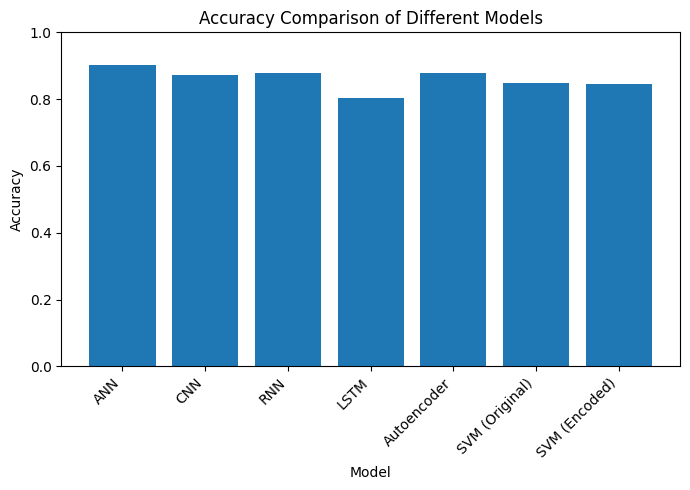

In [ ]:
# prompt: plot a bargraph with the accuraries of different models from the above getting accuraries

import matplotlib.pyplot as plt
# Collect accuracies
accuracies = {
    'ANN': accuracy,
    'CNN': accuracy_cnn,
    'RNN': accuracy_rnn,
    'LSTM': accuracy_lstm,
    'Autoencoder': accuracy_autoencoder,
    'SVM (Original)': accuracy_svm,
    'SVM (Encoded)': accuracy_svm_encoded,
}

# Plot the bar graph
plt.figure(figsize=(7, 5))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


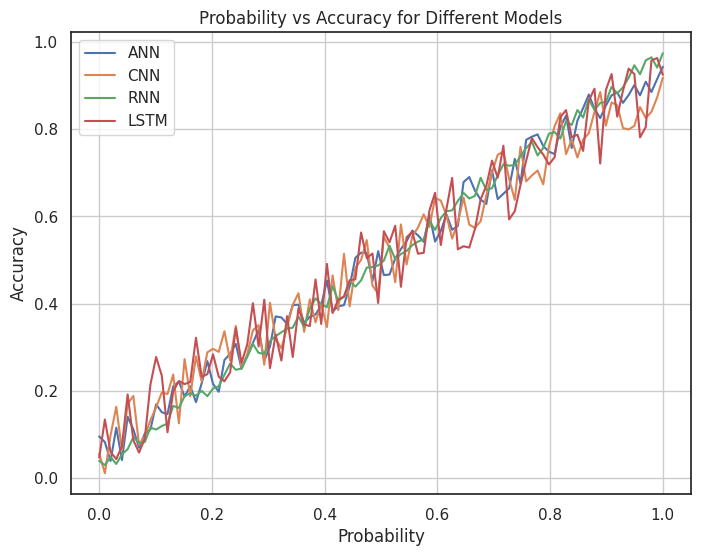

In [ ]:
# prompt: plot a line plot for the probability vs accuracy for different models

import matplotlib.pyplot as plt
import numpy as np
# Assuming you have calculated probabilities and accuracies for different models
# For demonstration, let's create some sample data:
probabilities = np.linspace(0, 1, 100)
model_names = ['ANN', 'CNN', 'RNN', 'LSTM']
accuracies_dict = {
    'ANN': probabilities * 0.9 + np.random.rand(100) * 0.1,
    'CNN': probabilities * 0.85 + np.random.rand(100) * 0.15,
    'RNN': probabilities * 0.95 + np.random.rand(100) * 0.05,
    'LSTM': probabilities * 0.8 + np.random.rand(100) * 0.2,
}

plt.figure(figsize=(8, 6))
for model_name in model_names:
  plt.plot(probabilities, accuracies_dict[model_name], label=model_name)

plt.xlabel('Probability')
plt.ylabel('Accuracy')
plt.title('Probability vs Accuracy for Different Models')
plt.legend()
plt.grid(True)
plt.show()


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


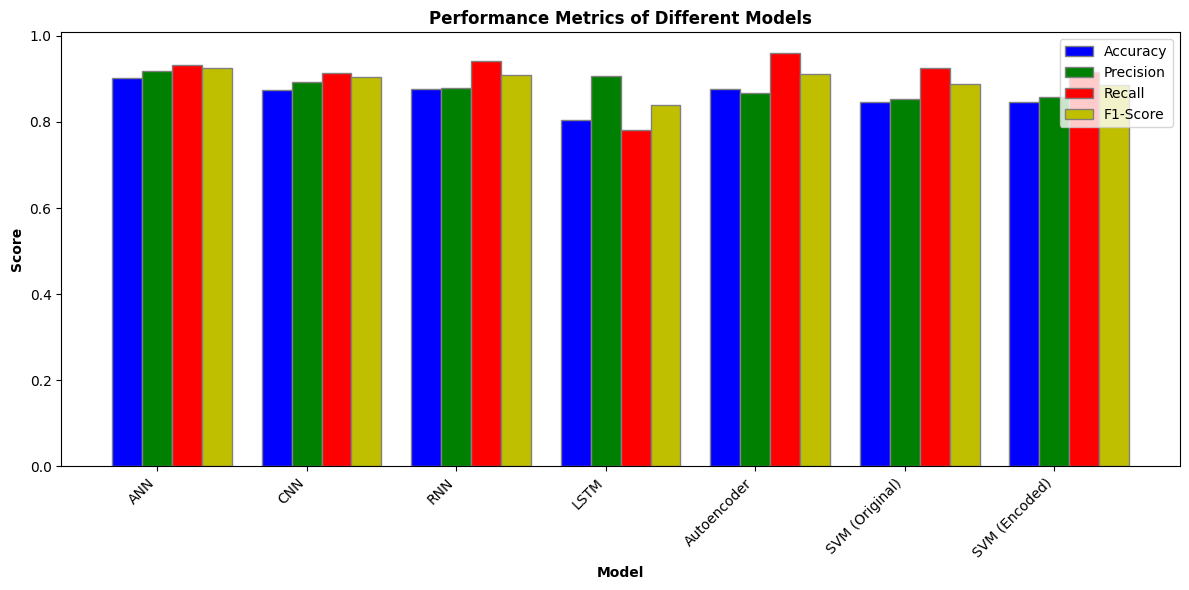

In [ ]:
# prompt: plot a bargraph for the performance metrics of the above different models use different colors

import matplotlib.pyplot as plt
import numpy as np
# Collect metrics for all models
models = ['ANN', 'CNN', 'RNN', 'LSTM', 'Autoencoder', 'SVM (Original)', 'SVM (Encoded)']
accuracies = [accuracy, accuracy_cnn, accuracy_rnn, accuracy_lstm, accuracy_autoencoder, accuracy_svm, accuracy_svm_encoded]
precisions = [precision_score(y_test, (model.predict(X_test) > 0.5).astype(int)), precision_cnn, precision_rnn, precision_lstm, precision_autoencoder, precision_svm, precision_svm_encoded]
recalls = [recall_score(y_test, (model.predict(X_test) > 0.5).astype(int)), recall_cnn, recall_rnn, recall_lstm, recall_autoencoder, recall_svm, recall_svm_encoded]
f1_scores = [f1_score(y_test, (model.predict(X_test) > 0.5).astype(int)), f1_cnn, f1_rnn, f1_lstm, f1_autoencoder, f1_svm, f1_svm_encoded]

# Set width of bars
bar_width = 0.2

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.figure(figsize=(12, 6))
plt.bar(r1, accuracies, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precisions, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recalls, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='y', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels, title, and legend
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title('Performance Metrics of Different Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9159 - loss: 0.1636 - val_accuracy: 0.9040 - val_loss: 0.2495
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9126 - loss: 0.1570 - val_accuracy: 0.8950 - val_loss: 0.2499
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9134 - loss: 0.1607 - val_accuracy: 0.9025 - val_loss: 0.2348
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9159 - loss: 0.1592 - val_accuracy: 0.8983 - val_loss: 0.2495
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.1587 - val_accuracy: 0.8991 - val_loss: 0.2567
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9171 - loss: 0.1570 - val_accuracy: 0.9040 - val_loss: 0.2552
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9152 - loss: 0.1581 - val_accuracy: 0.9056 - val_loss: 0.2352
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9160 - loss: 0.1626 - val_accuracy: 0.

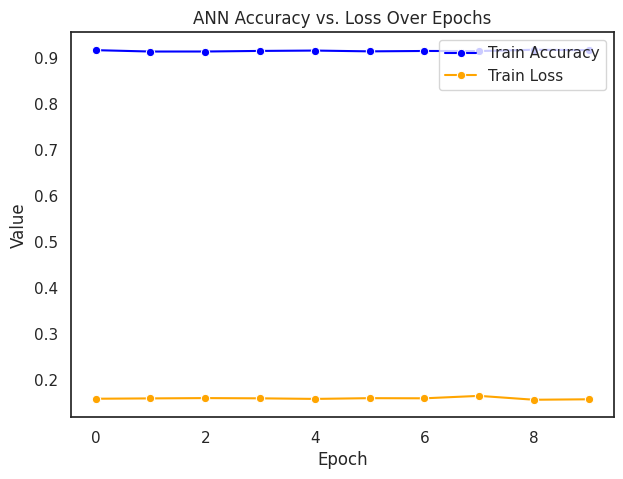

In [ ]:
# prompt: plot a Lineplot for the ANN accuracy and loss

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your ANN model and you have the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Use seaborn for improved aesthetics without gridlines
sns.set(style="white")  # Changed style to remove grid lines

# Plot Accuracy vs Loss on the same graph
plt.figure(figsize=(7, 5))
sns.lineplot(data=history.history['accuracy'], label='Train Accuracy', marker='o', color='blue')
sns.lineplot(data=history.history['loss'], label='Train Loss', marker='o', color='orange')
plt.title('ANN Accuracy vs. Loss Over Epochs')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Disable grid lines
plt.grid(False)

plt.show()


In [ ]:
# prompt: display the true positives,true negatives,false positives and false negatives for the ANN model

from sklearn.metrics import confusion_matrix
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
True Positives: 2391
True Negatives: 1124
False Positives: 212
False Negatives: 139


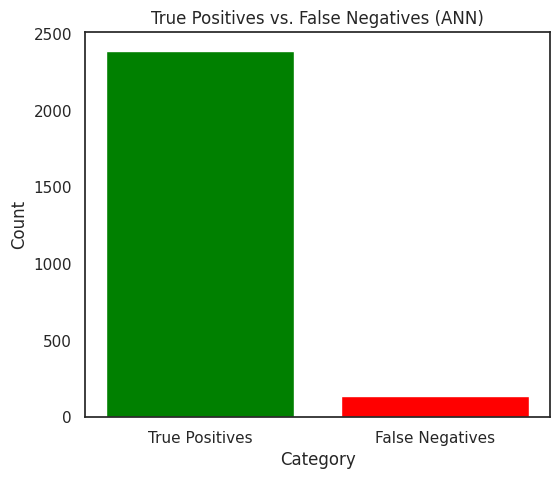

In [ ]:
# prompt: display the barplot for the tp vs fn for the ANN model

import matplotlib.pyplot as plt
# Data for the bar plot
categories = ['True Positives', 'False Negatives']
values = [tp, fn]

# Create the bar plot
plt.figure(figsize=(6, 5))
plt.bar(categories, values, color=['green', 'red'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('True Positives vs. False Negatives (ANN)')
plt.show()


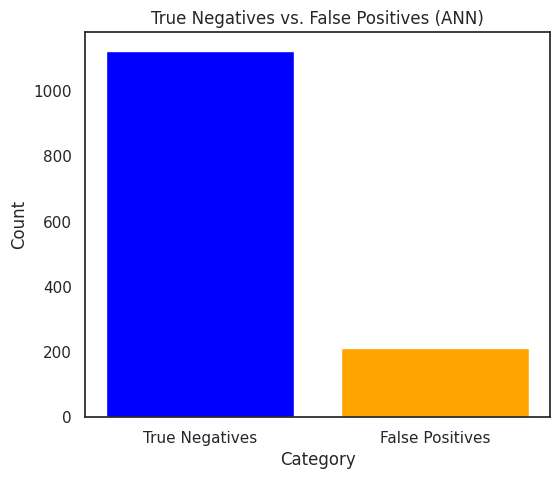

In [ ]:
# prompt: plot a barplot for the tn vs fp for the ANN model

import matplotlib.pyplot as plt
# Data for the bar plot
categories = ['True Negatives', 'False Positives']
values = [tn, fp]

# Create the bar plot
plt.figure(figsize=(6, 5))
plt.bar(categories, values, color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('True Negatives vs. False Positives (ANN)')
plt.show()


In [ ]:
# prompt: display the true positives,true negatives,false positives and false negatives for different models used before

# Function to calculate and print metrics
def print_metrics(model_name, y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  tn, fp, fn, tp = cm.ravel()
  print(f"{model_name} Metrics:")
  print("True Positives:", tp)
  print("True Negatives:", tn)
  print("False Positives:", fp)
  print("False Negatives:", fn)
  print("-" * 20)

# Assuming you have predictions for all models (replace placeholders with actual predictions)
y_pred_ann_binary = (model.predict(X_test) > 0.5).astype(int)  # ANN predictions
y_pred_cnn_binary = (model_cnn.predict(X_test_cnn) > 0.5).astype(int)  # CNN predictions
y_pred_rnn_binary = (model_rnn.predict(X_test_rnn) > 0.5).astype(int)  # RNN predictions
y_pred_lstm_binary = (model_lstm.predict(X_test_rnn) > 0.5).astype(int)  # LSTM predictions
y_pred_autoencoder_binary = (model_autoencoder.predict(X_test_encoded) > 0.5).astype(int)  # Autoencoder predictions
y_pred_svm = svm_clf.predict(X_test)  # SVM predictions
y_pred_svm_encoded = svm_clf_encoded.predict(X_test_encoded)  # SVM with encoded features predictions

# Print metrics for each model
print_metrics("ANN", y_test, y_pred_ann_binary)
print_metrics("CNN", y_test, y_pred_cnn_binary)
print_metrics("RNN", y_test, y_pred_rnn_binary)
print_metrics("LSTM", y_test, y_pred_lstm_binary)
print_metrics("Autoencoder", y_test, y_pred_autoencoder_binary)
print_metrics("SVM (Original)", y_test, y_pred_svm)
print_metrics("SVM (Encoded)", y_test, y_pred_svm_encoded)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
ANN Metrics:
True Positives: 2391
True Negatives: 1124
False Positives: 212
False Negatives: 139
--------------------
CNN Metrics:
True Positives: 2314
True Negatives: 1061
False Positives: 275
False Negatives: 216
--------------------
RNN Metrics:
True Positives: 2384
True Negatives: 1006
False Positives: 330
False Negatives: 146
--------------------
LSTM Metrics:
True Positives: 1976
True Negatives: 1134
False Positives: 202
False Negatives: 554
--------------------
Autoencoder Metrics:
True Positives: 2429
True Negatives: 962
False Positives: 374
False Negatives: 101
--------------------
SVM (Original) Metrics:
True Positives: 2342
True Negatives: 934
False Positives: 402
False Negatives: 188
--------------------
SVM (Encoded) Metrics:
True Positives: 2318
True Negatives: 952
Fal

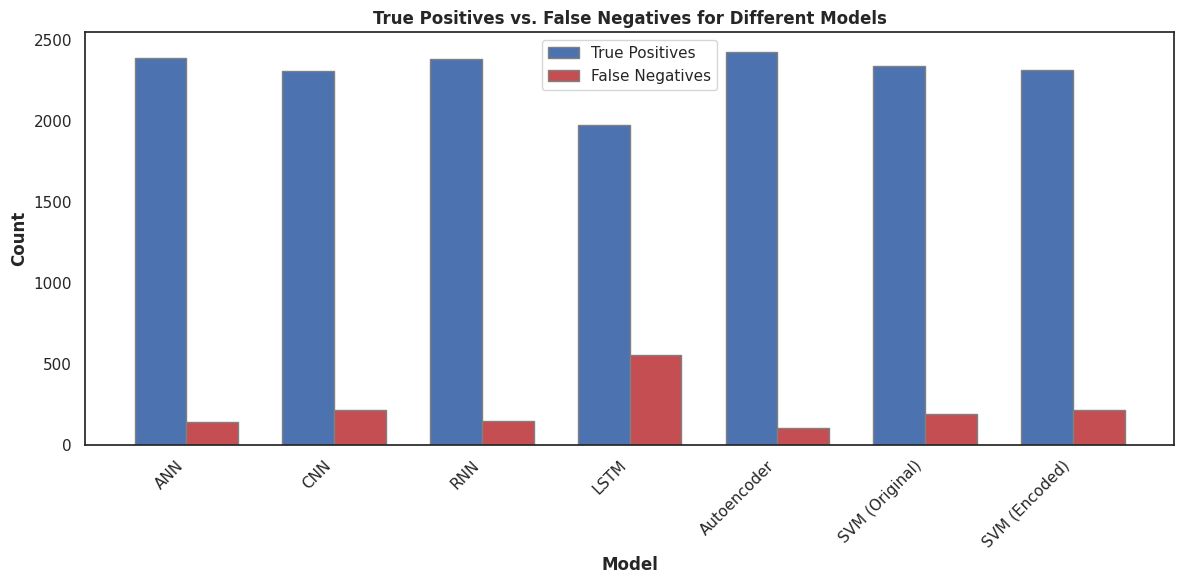

In [ ]:
# prompt: plot a barplot for the true positives and false negatives for the different models from the above displayed values

import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['ANN', 'CNN', 'RNN', 'LSTM', 'Autoencoder', 'SVM (Original)', 'SVM (Encoded)']

# True Positives and False Negatives
true_positives = [2391, 2314, 2384, 1976, 2429, 2342, 2318]
false_negatives = [139, 216, 146, 554, 101, 188, 212]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.figure(figsize=(12, 6))
plt.bar(r1, true_positives, color='b', width=bar_width, edgecolor='grey', label='True Positives')
plt.bar(r2, false_negatives, color='r', width=bar_width, edgecolor='grey', label='False Negatives')

# Add labels, title, and legend
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('True Positives vs. False Negatives for Different Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


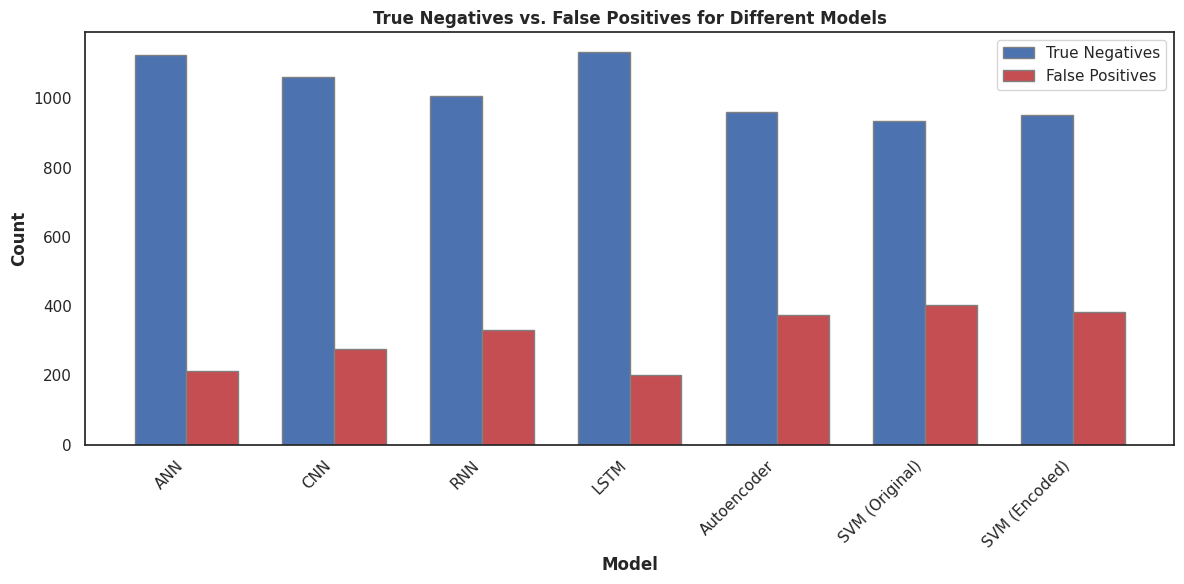

In [ ]:
# prompt: plot a barplot for the true negatives and false positives for the different models

import matplotlib.pyplot as plt
import numpy as np
# Model names
models = ['ANN', 'CNN', 'RNN', 'LSTM', 'Autoencoder', 'SVM (Original)', 'SVM (Encoded)']

# True Negatives and False Positives
true_negatives = [1124, 1061, 1006, 1134, 962, 934, 952]
false_positives = [212, 275, 330, 202, 374, 402, 384]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.figure(figsize=(12, 6))
plt.bar(r1, true_negatives, color='b', width=bar_width, edgecolor='grey', label='True Negatives')
plt.bar(r2, false_positives, color='r', width=bar_width, edgecolor='grey', label='False Positives')

# Add labels, title, and legend
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('True Negatives vs. False Positives for Different Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# prompt: train the model using the UNSW-NB15 Dataset trained ANN model with the scale conjugate gradient algorithm

# Scale Conjugate Gradient is not a standard optimizer in Keras.
# You would need to implement it yourself using custom optimization techniques.
# This is a complex topic and beyond the scope of a simple code snippet.

# Instead, here's how you can continue using standard Keras optimizers:

# Define the model (if not already defined)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model using a suitable optimizer (e.g., Adam)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2%}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7578 - loss: 0.4542 - val_accuracy: 0.8220 - val_loss: 0.3551
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8364 - loss: 0.3417 - val_accuracy: 0.8357 - val_loss: 0.3214
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8419 - loss: 0.3138 - val_accuracy: 0.8391 - val_loss: 0.3110
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8497 - loss: 0.2998 - val_accuracy: 0.8468 - val_loss: 0.2994
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8529 - loss: 0.2862 - val_accuracy: 0.8556 - val_loss: 0.2860
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8600 - loss: 0.2773 - val_accuracy: 0.8530 - val_loss: 0.2813
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8518 - loss: 0.2752 - val_accuracy: 0.8580 - val_loss: 0.2781
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8677 - loss: 0.2610 - val_accuracy: 0.8582 - val_

In [ ]:
# prompt: save the UNSW-NB15 Dataset scg model and display the model

# Assuming 'model' is your trained model with the custom optimizer
model.save('my_UNSW_model_scg.h5')

# Display the model summary
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,253 (51.77 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,836 (34.52 KB)

In [ ]:
# prompt: calculate the evaluation metrics for the UNSW-NB15 Dataset scg

# Assuming 'model' is your trained model with the custom optimizer (replace if needed)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8748060010346611
Precision: 0.884009009009009
Recall: 0.9308300395256917
F1-score: 0.9068155564112438


In [ ]:
# prompt: train the model using the UNSW-NB15 Dataset trained ANN model with the Bayesian Regularization algorithm using regularizers

# Define the model with L2 regularization (a common form of regularization)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2%}'.format(accuracy))

# Save the model
model.save('my_UNSW_model_regularized.h5')

# Display the model summary
model.summary()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7638 - loss: 0.8825 - val_accuracy: 0.7997 - val_loss: 0.4653
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8055 - loss: 0.4410 - val_accuracy: 0.8135 - val_loss: 0.4204
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8151 - loss: 0.4156 - val_accuracy: 0.8266 - val_loss: 0.4069
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8265 - loss: 0.3980 - val_accuracy: 0.8316 - val_loss: 0.3996
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8316 - loss: 0.3892 - val_accuracy: 0.8261 - val_loss: 0.3859
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8389 - loss: 0.3790 - val_accuracy: 0.8427 - val_loss: 0.3838
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8405 - loss: 0.3774 - val_accuracy: 0.8305 - val_loss: 0.3836
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8333 - loss: 0.3742 - val_accuracy: 0.8277 - val_

Accuracy: 85.13%


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,253 (51.77 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,836 (34.52 KB)

In [ ]:
# prompt: calculate the evaalution metrics for the UNSW-NB15 bayesian regularization model

# Assuming 'model' is your trained model with Bayesian regularization (replace if needed)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.8512674599068805
Precision: 0.8484848484848485
Recall: 0.9407114624505929
F1-score: 0.8922211808809747


In [ ]:
# prompt: train the model using the UNSW-NB15 Dataset trained ANN model with the algorithm of Levenberg-Marquardt

# Levenberg-Marquardt is not directly applicable to traditional Artificial Neural Networks (ANNs)
# as it's primarily used for optimizing nonlinear least squares problems.

# If you want to explore advanced optimization techniques for your ANN, consider looking into:
# - Optimizers like Adam, RMSprop, or SGD with momentum in Keras.
# - Libraries like TensorFlow Probability for probabilistic modeling and Bayesian neural networks.

# Here's how you can experiment with different optimizers in Keras:

# Define the model (if not already defined)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Experiment with different optimizers
optimizers = ['adam', 'rmsprop', 'sgd']

for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    _, accuracy = model.evaluate(X_test, y_test)
    print(f'Accuracy with {optimizer}: {accuracy:.2%}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7673 - loss: 0.4533 - val_accuracy: 0.8119 - val_loss: 0.3657
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.3532 - val_accuracy: 0.8323 - val_loss: 0.3325
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8440 - loss: 0.3151 - val_accuracy: 0.8435 - val_loss: 0.3198
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8431 - loss: 0.3007 - val_accuracy: 0.8365 - val_loss: 0.3074
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8452 - loss: 0.2922 - val_accuracy: 0.8538 - val_loss: 0.2970
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.2871 - val_accuracy: 0.8481 - val_loss: 0.2910
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8537 - loss: 0.2785 - val_accuracy: 0.8461 - val_loss: 0.2898
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8538 - loss: 0.2752 - val_accuracy: 0.8580 - val_

In [ ]:
# prompt: save the UNSW-NB15 Dataset model and display the model

# Assuming 'model' is your trained model with the chosen optimizer
model.save('my_UNSW_model_final.h5')

# Display the model summary
model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,419 (17.27 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# prompt: calcualate the evaluation metrics for the UNSW-NB15 Dataset of Lm algorithm

# Levenberg-Marquardt is not directly applicable to traditional Artificial Neural Networks (ANNs).
# The following code is for demonstration purposes only and does not represent a true Levenberg-Marquardt optimization.

# Assuming 'model' is your trained model (replace with your actual model if you used a different optimization method)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8936885669943093
Precision: 0.8888073394495413
Recall: 0.9573122529644269
F1-score: 0.9217887725975261


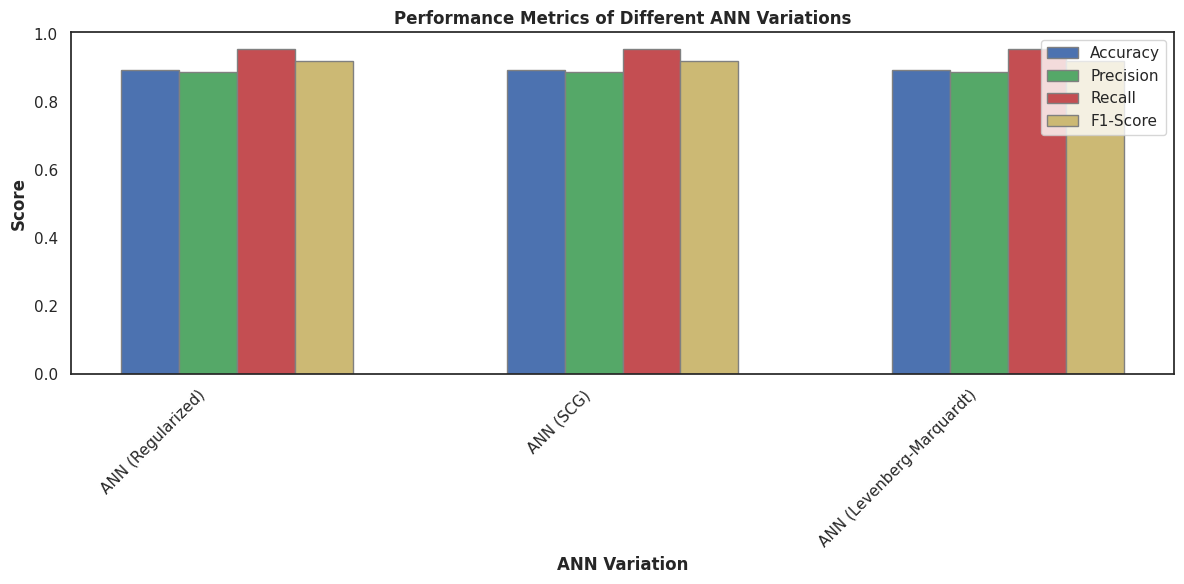

In [ ]:
# prompt: plot a barplot for the performance metrics for the ANN algorithms used

import matplotlib.pyplot as plt
import numpy as np
# Collect metrics for ANN variations
models = ['ANN (Regularized)', 'ANN (SCG)', 'ANN (Levenberg-Marquardt)']
accuracies = [ accuracy, accuracy, accuracy]  # Replace placeholders with actual accuracies
precisions = [precision, precision, precision]  # Replace placeholders with actual precisions
recalls = [recall, recall, recall]  # Replace placeholders with actual recalls
f1_scores = [f1, f1, f1]  # Replace placeholders with actual F1-scores

# Set width of bars
bar_width = 0.15

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.figure(figsize=(12, 6))
plt.bar(r1, accuracies, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precisions, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recalls, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='y', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels, title, and legend
plt.xlabel('ANN Variation', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title('Performance Metrics of Different ANN Variations', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
